<a href="https://colab.research.google.com/github/anggaangoro3/LLM-Twitter-Transportation-Classification/blob/main/Revisi_Final_V2_UAS_BGTDMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Kurang, Pendekatan sederhana berbasis keyword matching.
2. Melakukan test inputan berdasarkan teks
3. Labeling setelah preprocessing

In [ ]:
!pip install tensorflow
!pip install Sastrawi


from IPython import get_ipython
from IPython.display import display
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from collections import defaultdict, Counter
import warnings
warnings.filterwarnings('ignore')

# Libraries untuk preprocessing
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Libraries untuk modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Neural Network libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Evaluation libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
import nltk

# NLTK dan Sastrawi imports - PERBAIKAN 1
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer # Import PorterStemmer

# Sastrawi
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


# Download NLTK data
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    # Add the download for 'punkt_tab'
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')
    # Explicitly download 'punkt_tab' if not found
    nltk.download('punkt_tab') # Tambahkan download untuk punkt_tab

drive.mount('/content/drive')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Mounted at /content/drive


In [ ]:
# Mount the Google Drive at /content/drive
drive.mount('/content/drive')

# Read each CSV file and store the resulting DataFrames in lists
data_darat_list = [
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/M.121(1januari-31desember2013).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/J.257(1jan-30desember2011)N.csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/L.175(14-01-01s.d.14-12-31).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/Q.766(1agustus-1desember2015).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/A.913(1jan-30desember2013)N.csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/C.1007(1juni-30desember2012).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/D.1000(1jan-30desember2009)N.csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/E.1013(1juni-30desember2011).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/F.347(1maret-1april2012).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/G.283(01januari-01februari2012).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/H.275(01februari-1maret2012).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/I.222(1januari -12desember2012).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/K.183(10-01-01s.d.14-12-31).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/N.108(1juni-30desember2009).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/O. 733(1 januari-1 april2015).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/P.1009(1april-1agustus)2015.csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/DARAT 2021-2024.csv")
]

data_laut_list = [
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/E.1191(1mei-30desember2012).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/H.609(1mei-30desember2017).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/D.198(1agustusi11-3desember2011).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/C.2096(1agustusi11-30desember2011)kapal_laut.csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/A.821(1mei-30desember2009).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/B.1000(1mei-30desember2010).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/D.198(1agustusi11-3desember2011).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/F.1005(1januari-1maret2015).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/G.1012(1maret-1juni2015).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/I.800(1mei-30desember2018).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/Laut 2021-2024.csv"),
]

data_udara_list = [
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/H.397(1julidesember2014).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/I.414(1maret-1juni2015).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/E.1015(1juli11-30september2011).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/A.38(1januari-30mei2009).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/B.43(1januari-30mei2009).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/C.1011(1juni-30desember2009).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/D.1044(1mei-30desember2010).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/F.592(1januari11-30julis2011).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/G.1506(1mei-30desember2012).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/J.933(1januari-1maret2015).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/K.727(1januari-30mei2016).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/O.Udara1.csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/Udara 2021-2024.csv")
]
# Menggabungkan semua data
data_combined = pd.concat(data_darat_list + data_laut_list + data_udara_list, ignore_index=True)
print(f"Dataset berhasil digabungkan: {len(data_combined)} baris data")
print(f"Kolom yang tersedia: {list(data_combined.columns)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset berhasil digabungkan: 51054 baris data
Kolom yang tersedia: ['conversation_id_str', 'created_at', 'favorite_count', 'full_text', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'username', 'Source.Name']


Pre_Processing

In [ ]:
TEXT_COLUMN = 'full_text'
# kamus stopword
kamus_file_path = '/content/drive/Shareddrives/UAS BGDTMG data Source/kamus.txt'
slang_file_path = '/content/drive/Shareddrives/UAS BGDTMG data Source/slang.csv'

# Preprocessing Functions
# Enhanced Preprocessing Functions
def enhanced_preprocess_text(text):
    """
    Fungsi preprocessing yang disempurnakan untuk mengatasi masalah kata bergabung
    """
    if pd.isna(text):
        return ""
    # Convert to string jika bukan
    text = str(text)
    # Convert to lowercase
    text = text.lower()
    # Menghapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Menghapus mention dan hashtag (@username)
    text = re.sub(r'@\w+|#\w+|\brt\b', '', text)
    # Menghapus entitas HTML
    text = re.sub(r'&\w+;', '', text)
    # Menangani karakter pemisah sebelum dihapus untuk mencegah kata bergabung
    separator_patterns = [r'/', r'-', r'_', r'\|', r'\\', r'\.', r':', r';', r'\+', r'=', r'~']
    combined_pattern = '|'.join(separator_patterns)
    text = re.sub(f'({combined_pattern})', ' ', text)
    # Memisahkan kata yang mengandung angka dan huruf yang berdekatan
    text = re.sub(r'(\d)([a-zA-Z])', r'\1 \2', text)
    text = re.sub(r'([a-zA-Z])(\d)', r'\1 \2', text)
    # Memisahkan camelCase atau PascalCase
    text = re.sub(r'([a-z])([A-Z])', r'\1 \2', text)
    # Menghapus karakter khusus dan angka
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Menghapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def fix_word_separation(text):
    """
    Fungsi khusus untuk memisahkan kata-kata yang bergabung berdasarkan pattern umum
    """
    if not text:
        return text

    # Dictionary untuk perbaikan kata yang sering bergabung
    common_fixes = {
        'jakartabandung': 'jakarta bandung',
        'bandungjakarta': 'bandung jakarta',
        'surabayamalang': 'surabaya malang',
        'semarangjogja': 'semarang jogja',
        'jogjasolo': 'jogja solo',
        'jauhdekat': 'jauh dekat',
        'baikburuk': 'baik buruk',
        'cepatlamban': 'cepat lamban',
        'besarkecil': 'besar kecil',
        'tinggirendah': 'tinggi rendah',
        'pantaiselatan': 'pantai selatan',
        'pantaiutara': 'pantai utara',
        'jalantol': 'jalan tol',
        'busway': 'bus way',
        'keretaapi': 'kereta api',
        'angkutankota': 'angkutan kota',
        'angkutanumum': 'angkutan umum',
    }

    # Menerapkan perbaikan
    for wrong, correct in common_fixes.items():
        text = text.replace(wrong, correct)

    # Pattern untuk memisahkan kata berdasarkan pola umum
    city_pattern = r'\b(\w{4,})(bandung|jakarta|surabaya|semarang|jogja|solo|malang|medan|palembang|makassar)\b'
    text = re.sub(city_pattern, r'\1 \2', text, flags=re.IGNORECASE)

    adjective_pattern = r'\b(\w{4,})(baik|buruk|besar|kecil|jauh|dekat|cepat|lambat|tinggi|rendah|panjang|pendek)\b'
    text = re.sub(adjective_pattern, r'\1 \2', text, flags=re.IGNORECASE)

    return text

def load_custom_stopwords(kamus_path, slang_path):
    """
    Memuat daftar stopwords dari file eksternal dengan enhanced integration
    """
    print("Memuat custom stopwords dari file...")

    # Memuat stopwords dasar
    generic_stopwords = set([
        'rt', 'via', 'the', 'of', 'to', 'and', 'a', 'in', 'is', 'it', 'you', 'that',
        'wkwk', 'hehe', 'haha', 'xixi', 'guys', 'gaes', 'lol', 'yeah', 'again'
    ])

    # Memuat dari kamus.txt
    try:
        with open(kamus_path, 'r', encoding='utf-8') as f:
            kamus_stopwords = {line.strip() for line in f}
        print(f"Berhasil memuat {len(kamus_stopwords)} kata dari {kamus_path}")
    except Exception as e:
        print(f"Gagal memuat {kamus_path}: {e}")
        kamus_stopwords = set()

    # Memuat dari slang.csv
    try:
        slang_df = pd.read_csv(slang_path)
        slang_stopwords = set(slang_df[slang_df.columns[0]].astype(str).tolist())
        print(f"Berhasil memuat {len(slang_stopwords)} kata dari {slang_path}")
    except Exception as e:
        print(f"Gagal memuat {slang_path}: {e}")
        slang_stopwords = set()

    # Menggabungkan dengan NLTK stopwords Indonesia
    try:
        nltk_indo_stopwords = set(stopwords.words('indonesian'))
        print(f"Berhasil memuat {len(nltk_indo_stopwords)} stopwords NLTK Indonesia")
    except Exception as e:
        print(f"Gagal memuat NLTK stopwords: {e}")
        nltk_indo_stopwords = set()

    # Enhanced: Add Sastrawi stopwords
    try:
        sastrawi_stopword_factory = StopWordRemoverFactory()
        sastrawi_stopwords = set(sastrawi_stopword_factory.get_stop_words())
        print(f"Berhasil memuat {len(sastrawi_stopwords)} stopwords Sastrawi")
    except Exception as e:
        print(f"Gagal memuat Sastrawi stopwords: {e}")
        sastrawi_stopwords = set()

    # Menggabungkan semua stopwords
    combined_stopwords = generic_stopwords.union(kamus_stopwords).union(slang_stopwords).union(nltk_indo_stopwords).union(sastrawi_stopwords)
    print(f"Total stopwords yang unik: {len(combined_stopwords)}")
    return combined_stopwords

def remove_stopwords_indonesian(text, stopwords_set):
    """Menghapus stopwords Indonesia dan kata-kata pendek (< 3 karakter)."""
    if not text:
        return ""
    words = text.split()
    filtered_words = [word for word in words
                      if word not in stopwords_set and len(word) > 2]
    return ' '.join(filtered_words)

# Enhanced Sastrawi Integration
factory = StemmerFactory()
sastrawi_stemmer = factory.create_stemmer()

def apply_sastrawi_stemming(text):
    """
    Melakukan stemming Bahasa Indonesia menggunakan Sastrawi dengan error handling
    """
    if not text:
        return ""
    try:
        return sastrawi_stemmer.stem(text)
    except Exception as e:
        print(f"Error in stemming: {e}")
        return text

# Enhanced Preprocessing Pipeline
def enhanced_data_preprocessing_pipeline(df, text_column):
    print("\n" + "="*60)
    print("MEMULAI ENHANCED PREPROCESSING PIPELINE")
    print("="*60)

    stopwords_custom = load_custom_stopwords(kamus_file_path, slang_file_path)
    df_enhanced = df.copy()

    print("1. Menangani missing values...")
    df_enhanced[text_column] = df_enhanced[text_column].fillna('')

    print("2. Enhanced text cleaning...")
    df_enhanced['text_cleaned_enhanced'] = df_enhanced[text_column].apply(enhanced_preprocess_text)

    print("3. Memperbaiki kata yang bergabung...")
    df_enhanced['text_fixed'] = df_enhanced['text_cleaned_enhanced'].apply(fix_word_separation)

    print("4. Menghapus stopwords dan tokenisasi...")
    df_enhanced['text_no_stopwords'] = df_enhanced['text_fixed'].apply(
        lambda x: remove_stopwords_indonesian(x, stopwords_custom)
    )

    print("5. Enhanced Sastrawi stemming...")
    df_enhanced['text_stemmed'] = df_enhanced['text_no_stopwords'].apply(apply_sastrawi_stemming)

    print("6. Final cleaning...")
    df_enhanced['text_processed_final'] = df_enhanced['text_stemmed'].apply(
        lambda x: ' '.join(x.split()) if x else ''
    )

    initial_count = len(df_enhanced)
    df_enhanced = df_enhanced[df_enhanced['text_processed_final'].str.len() > 0]
    removed_count = initial_count - len(df_enhanced)

    if removed_count > 0:
        print(f"Dihapus {removed_count} baris dengan teks kosong setelah preprocessing")

    df_enhanced['original_length'] = df_enhanced[text_column].str.len()
    df_enhanced['final_length'] = df_enhanced['text_processed_final'].str.len()
    df_enhanced['word_count_final'] = df_enhanced['text_processed_final'].str.split().str.len()

    print(f"Enhanced preprocessing selesai. Data akhir: {len(df_enhanced)} baris")
    print(f"Rata-rata panjang teks original: {df_enhanced['original_length'].mean():.1f} karakter")
    print(f"Rata-rata panjang teks final: {df_enhanced['final_length'].mean():.1f} karakter")
    print(f"Rata-rata jumlah kata final: {df_enhanced['word_count_final'].mean():.1f} kata")

    return df_enhanced

# RULE-BASED TEXT CLASSIFICATION & LABELING
def create_transport_keywords():
    """Membuat dictionary keyword yang sudah dibersihkan dari duplikasi dan diurutkan."""

    transport_keywords = {
        'darat': sorted(list(set([
            'andong', 'angdes', 'angkot', 'angkutan kota', 'angkutan pedesaan', 'bajaj',
            'becak', 'bis', 'bus', 'commuter', 'delman', 'elf', 'gerbong', 'gojek', 'grab',
            'hiace', 'kereta', 'kereta api', 'kereta barang', 'kereta cepat', 'kereta lokal',
            'konvoi', 'krl', 'lrt', 'metro', 'mikrolet', 'minibus', 'mobil', 'mobil pribadi',
            'mobil sewaan', 'monorel', 'motor', 'mrt', 'odong-odong', 'ojek', 'ojol',
            'patwal', 'pickup', 'rental mobil', 'sepeda', 'sepeda listrik', 'shuttle bus',
            'skuter', 'skuter listrik', 'subway', 'taksi', 'taxi', 'touring', 'trailer',
            'transjakarta', 'transway', 'travel', 'trem', 'tronton', 'truk', 'truck', 'vespa',
            'angkot online', 'angkutan umum', 'angkutan pribadi', 'angkutan online', 'angkutan sekolah', 'angkutan industri',
            'balap motor', 'biker', 'bus malam', 'bus sekolah', 'cikar', 'driver online', 'ev', 'kendaraan bermotor',
            'kendaraan umum', 'kendaraan pribadi', 'konvoi kendaraan', 'konvoi mobil', 'konvoi motor', 'motor listrik',
            'ojek pangkalan', 'ojek online', 'plat hitam', 'plat kuning', 'plat merah', 'pos polisi', 'rambu darat',
            'sepeda motor', 'sopir truk', 'spion', 'spion mobil', 'spion motor', 'stasiun kereta', 'truk pasir',
            'truk tambang', 'truk tangki', 'truk trailer', 'truk sampah', 'truk derek', 'tukang ojek', 'pengendara',
            'pemotor', 'mobil dinas', 'jalan raya', 'jalan tol', 'jalan rusak', 'jalan berlubang', 'kendaraan listrik',
            'damri'

            # Infrastructure
            'depo kereta', 'flyover', 'garasi', 'garage', 'gerbang tol', 'halte', 'jalan',
            'jalur', 'jalur sepeda', 'jembatan', 'jembatan penyeberangan orang', 'jpo',
            'koridor', 'lampu merah', 'lalu lintas', 'lokomotif', 'macet', 'kemacetan',
            'marka jalan', 'parkir', 'parkiran', 'perlintasan', 'pintu tol', 'pom bensin',
            'pool bus', 'rambu', 'rambu lalu lintas', 'raya', 'rel', 'rest area', 'rute',
            'shelter', 'simpang susun', 'spbu', 'stasiun', 'terminal', 'tol', 'traffic',
            'traffic light', 'trayek', 'trotoar', 'underpass', 'zebra cross',
            # Activities
            'ban bocor', 'berangkat kerja', 'berangkat sekolah', 'berkendara', 'carpooling',
            'driver', 'ganti oli', 'isi bensin', 'jalur darat', 'jalanan lancar', 'jalanan padat',
            'kecelakaan', 'kernet', 'kondektur', 'masinis', 'mengemudi', 'menyetir', 'mogok',
            'mudik darat', 'naik bus', 'naik kereta', 'naik motor', 'naik ojek', 'nebeng',
            'ngebut', 'nyetir', 'pelan-pelan', 'penumpang', 'perjalanan darat', 'perjalanan jauh',
            'perjalanan dekat', 'perjalanan mudik', 'ramai lancar', 'razia', 'servis',
            'supir', 'tilang', 'turun angkot', 'transportasi darat', 'kendaraan darat', 'angkutan darat'
            'terminal bus','terminal antarkota','bus antarkota'
        ]))),
        'laut': sorted(list(set([
            'asdp', 'boat', 'container', 'cruiser', 'feri', 'ferry', 'getek', 'jet ski',
            'kapal', 'kapal barang', 'kapal cepat', 'kapal feri', 'kapal kargo', 'kapal laut',
            'kapal nelayan', 'kapal patroli', 'kapal penumpang', 'kapal perang', 'kapal pesiar',
            'kapal ro-ro', 'kapal roro', 'kapal selam', 'kapal tanker', 'kapal tunda',
            'kargo', 'katamaran', 'kontainer', 'nelayan', 'pelni', 'perahu', 'perahu motor',
            'pinisi', 'rakit', 'sampan', 'speedboat', 'tanker', 'tongkang', 'tugboat', 'yacht',
            'alur pelayaran', 'angkutan laut', 'armada laut', 'awak kapal laut', 'berlayar di laut', 'dermaga apung',
            'jalur perairan', 'jalur pelayaran laut', 'kapal cepat antar pulau', 'kapal penyeberangan',
            'kapal tradisional', 'muatan kapal', 'naik kapal laut', 'nautika', 'omnibus laut', 'pelabuhan nelayan',
            'pelabuhan utama', 'penjaga pantai', 'perahu nelayan', 'perjalanan laut', 'peti kemas', 'sinyal maritim',
            'tiket kapal', 'transportasi perairan', 'zona pelayaran', 'penjaga mercusuar'

            # Infrastructure
            'area sandar', 'bea cukai', 'danau', 'dermaga', 'dok', 'galangan kapal',
            'gudang pelabuhan', 'jalur pelayaran', 'laut', 'marina', 'menara suar',
            'mercusuar', 'muara', 'navigasi', 'pantai', 'pelabuhan', 'pemecah gelombang',
            'perairan', 'samudra', 'selat', 'sungai besar', 'syahbandar', 'tanjung', 'teluk',
            # Activities
            'abk', 'aktivitas pelayaran', 'awak kapal', 'badai', 'berlabuh', 'berlayar',
            'berperahu', 'jalur laut', 'kapten kapal', 'kelasi', 'mabuk laut', 'melaut',
            'menyeberang', 'mudik laut', 'naik ferry', 'naik kapal', 'naik perahu', 'nahkoda',
            'ombak', 'pelayaran', 'penyeberangan', 'penyeberangan laut', 'perjalanan laut',
            'shipping', 'terdampar', 'transportasi laut', 'tur kapal pesiar', 'tur laut'
        ]))),
        'udara': sorted(list(set([
            'airasia', 'airbus', 'aircraft', 'airplane', 'atr', 'balon udara', 'batik air',
            'boeing', 'cessna', 'citilink', 'drone', 'garuda', 'garuda indonesia', 'glider',
            'helikopter', 'helicopter', 'jet', 'jet komersial', 'jet pribadi', 'lion air',
            'maskapai', 'pelita air', 'pesawat', 'pesawat carter', 'pesawat charter',
            'pesawat komersial', 'pesawat perintis', 'pesawat pribadi', 'pesawat ringan',
            'pesawat tempur', 'plane', 'skytruck', 'sriwijaya', 'super air jet', 'transnusa',
            'uav', 'wings air','angkasa', 'angkutan udara', 'angkutan penerbangan', 'autopilot',
            'bandara internasional', 'bandara domestik','bandara perintis', 'boarding lounge',
            'flight attendant', 'flight crew', 'jalur penerbangan', 'jadwal penerbangan',
            'kabin pesawat', 'kode penerbangan', 'komando penerbangan', 'kontrol lalu lintas udara', 'layanan penerbangan',
            'lepas landas darurat', 'maskapai penerbangan', 'naik helikopter', 'penerbangan domestik', 'penerbangan internasional',
            'penerbangan komersial', 'penerbangan perintis', 'pengatur lalu lintas udara', 'pesawat komuter',
            'pilot trainee', 'pramugari maskapai', 'rute udara', 'ruang kabin', 'terminal bandara', 'zona udara'

            # Infrastructure
            'air traffic control', 'airport', 'apron', 'area bagasi', 'area kedatangan',
            'area keberangkatan', 'baggage claim', 'bandara', 'bandar udara', 'boarding gate',
            'check-in counter', 'control tower', 'garbarata', 'gate', 'gerbang', 'halim',
            'hangar', 'imigrasi', 'jet bridge', 'juanda', 'kualanamu', 'landasan pacu',
            'lounge', 'menara atc', 'menara pengawas', 'ngurah rai', 'runway', 'soekarno hatta',
            'taxiway', 'terminal', 'terminal domestik', 'terminal internasional', 'terminal udara',
            # Activities
            'awak kabin', 'bagasi', 'bagasi kabin', 'bagasi terdaftar', 'boarding', 'boarding pass',
            'cabin crew', 'check in', 'delay', 'dibatalkan', 'ditunda', 'flight', 'flight schedule',
            'gagal terbang', 'ground handling', 'jalur udara', 'ketinggian jelajah', 'kopilot',
            'landing', 'lepas landas', 'mendarat', 'mudik udara', 'naik pesawat', 'nomor penerbangan',
            'penerbangan', 'penerbangan malam', 'perjalanan udara', 'pilot', 'pramugara', 'pramugari',
            'take off', 'terbang', 'tiket pesawat', 'transit', 'turbulensi', 'turun pesawat', 'transportasi udara'
        ])))
    }
    return transport_keywords

# Enhanced Classification Function dengan Improved Logic
def enhanced_classify_transport_type(text, keywords_dict, min_threshold=1):
    """
    Enhanced klasifikasi dengan weighted scoring dan context awareness
    """
    if not text or pd.isna(text):
        return 'tidak_teridentifikasi'

    text_lower = str(text).lower()
    scores = {}
    detailed_matches = {}

    # Hitung skor untuk setiap kategori
    for transport_type, keywords in keywords_dict.items():
        score = 0
        matches = []

        for keyword in keywords:
            if keyword in text_lower:
                # Weight berdasarkan panjang keyword (keyword lebih spesifik = weight lebih tinggi)
                weight = len(keyword.split())
                score += weight
                matches.append((keyword, weight))

        scores[transport_type] = score
        detailed_matches[transport_type] = matches

    # Cari skor maksimum
    max_score = max(scores.values()) if scores.values() else 0

    if max_score < min_threshold:
        return 'tidak_teridentifikasi'

    # Jika ada tie, pilih berdasarkan priority order dan kualitas match
    max_categories = [cat for cat, score in scores.items() if score == max_score]

    if len(max_categories) == 1:
        return max_categories[0]

    # Priority order untuk tie-breaking: darat > udara > laut
    priority_order = ['darat', 'udara', 'laut']

    for priority_cat in priority_order:
        if priority_cat in max_categories:
            return priority_cat

    return max_categories[0]  # fallback

def apply_enhanced_labeling(df, text_column='text_processed_final'):
    """
    Menerapkan enhanced labeling dengan detailed analysis
    """
    print("\n" + "="*60)
    print("MENERAPKAN ENHANCED LABELING TRANSPORTASI")
    print("="*60)

    keywords = create_transport_keywords()

    print("Menerapkan klasifikasi enhanced...")
    df['transport_label'] = df[text_column].apply(
        lambda x: enhanced_classify_transport_type(x, keywords, min_threshold=1)
    )

    # Analisis distribusi
    label_counts = df['transport_label'].value_counts()
    print("\nDistribusi label enhanced:")
    for label, count in label_counts.items():
        percentage = (count/len(df)*100)
        print(f"  {label}: {count:,} ({percentage:.1f}%)")

    # Analisis kualitas labeling
    identified_ratio = (len(df) - label_counts.get('tidak_teridentifikasi', 0)) / len(df) * 100
    print(f"\nRasio identifikasi: {identified_ratio:.1f}%")

    return df

# Enhanced WordCloud dengan Custom Stopwords
def generate_enhanced_wordcloud_per_label(df, text_column, custom_stopwords=None):
    """
    Enhanced WordCloud generation dengan custom stopwords dan improved visualization
    """
    print("\n" + "="*60)
    print("GENERATING ENHANCED WORDCLOUD PER LABEL")
    print("="*60)

    # Kombinasi custom stopwords
    if custom_stopwords is None:
        try:
            custom_stopwords = load_custom_stopwords(kamus_file_path, slang_file_path)
        except:
            custom_stopwords = set(stopwords.words('indonesian'))

    # Tambahan stopwords khusus untuk wordcloud
    wordcloud_stopwords = custom_stopwords.union({
        'yang', 'ini', 'itu', 'dan', 'atau', 'juga', 'dengan', 'untuk', 'dari', 'ke',
        'di', 'pada', 'dalam', 'oleh', 'karena', 'saat', 'waktu', 'sudah', 'akan',
        'bisa', 'dapat', 'harus', 'mau', 'ingin', 'seperti', 'kalau', 'kalo'
    })

    labels = df['transport_label'].unique()
    labels = [label for label in labels if label != 'tidak_teridentifikasi']

    if not labels:
        print("Tidak ada label transportasi yang teridentifikasi untuk wordcloud.")
        return

    n_labels = len(labels)
    n_cols = 2
    n_rows = (n_labels + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 7 * n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()

    colors = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

    for i, label in enumerate(labels):
        ax = axes[i] if len(axes) > 1 else axes
        subset = df[df['transport_label'] == label]

        # Menggabungkan semua teks
        text_combined = " ".join(subset[text_column].dropna().astype(str))

        if not text_combined or len(text_combined.strip()) == 0:
            ax.set_title(f'WordCloud: {label.capitalize()}\n(Tidak ada data)', fontsize=14)
            ax.axis('off')
            continue

        # Generate enhanced wordcloud
        try:
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',
                max_words=150,
                stopwords=wordcloud_stopwords,
                colormap=colors[i % len(colors)],
                relative_scaling=0.5,
                min_font_size=10,
                max_font_size=100,
                collocations=False
            ).generate(text_combined)

            ax.imshow(wordcloud, interpolation='bilinear')
            ax.set_title(f'WordCloud: {label.capitalize()}\n({len(subset):,} teks)',
                        fontsize=14, fontweight='bold', pad=20)
            ax.axis('off')

        except Exception as e:
            print(f"Error generating wordcloud for {label}: {e}")
            ax.set_title(f'WordCloud: {label.capitalize()}\n(Error generating)', fontsize=14)
            ax.axis('off')

    # Hide unused subplots
    for j in range(len(labels), len(axes)):
        if j < len(axes):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    # Print stopwords info
    print(f"\nCustom stopwords digunakan: {len(wordcloud_stopwords):,} kata")
    print("Stopwords sources: NLTK Indonesian + Sastrawi + Custom files + WordCloud specific")

**Model kami berhasil mengatasi teks ambigu yang menyebutkan 3 label sekaligus dalam satu teks**

In [ ]:
# PIPELINE EXECUTION
# Main Pipeline Function
def run_enhanced_complete_pipeline(data_combined, text_column):
    """
    Enhanced complete pipeline dengan improved functionality
    """
    print("="*80)
    print("MENJALANKAN ENHANCED COMPLETE PIPELINE")
    print("="*80)

    print(f"Data input: {len(data_combined):,} baris")
    print(f"Kolom teks yang digunakan: {text_column}")

    # Enhanced Preprocessing
    data_processed = enhanced_data_preprocessing_pipeline(data_combined, text_column)

    # Enhanced Labeling
    data_labeled = apply_enhanced_labeling(data_processed, 'text_processed_final')

    # Final summary
    print("\n" + "="*60)
    print("RINGKASAN HASIL ENHANCED PIPELINE")
    print("="*60)
    print(f"Data awal: {len(data_combined):,} baris")
    print(f"Data setelah preprocessing: {len(data_processed):,} baris")
    print(f"Data setelah labeling: {len(data_labeled):,} baris")

    # Sample hasil
    print("\nSample hasil enhanced processing (3 data pertama per label):")
    for label in data_labeled['transport_label'].unique():
        print(f"\n--- Label: {label} ---")
        sample = data_labeled[data_labeled['transport_label'] == label].head(3)
        for idx, row in sample.iterrows():
            print(f"Original: {row[text_column][:100]}...")
            print(f"Processed: {row['text_processed_final'][:100]}...")
            print(f"Label: {row['transport_label']}")
            print("-" * 50)

    return data_labeled

# Execute the enhanced pipeline
def main_enhanced_execution(data_combined):
    """
    Enhanced main execution function
    """
    print("MEMULAI ENHANCED EKSEKUSI PIPELINE TRANSPORTASI")
    print("="*80)

    # Run enhanced pipeline
    result_data = run_enhanced_complete_pipeline(data_combined, TEXT_COLUMN)

    print("\n Enhanced Pipeline selesai dijalankan!")
    print(f" Dataset final tersedia dengan {len(result_data):,} baris")
    print(" Kolom yang tersedia:")

    for col in result_data.columns:
        print(f"   - {col}")

    return result_data

# Execute main pipeline
print("Starting Enhanced Transport Classification Pipeline...")
data_final = main_enhanced_execution(data_combined)

Starting Enhanced Transport Classification Pipeline...
MEMULAI ENHANCED EKSEKUSI PIPELINE TRANSPORTASI
MENJALANKAN ENHANCED COMPLETE PIPELINE
Data input: 51,054 baris
Kolom teks yang digunakan: full_text

MEMULAI ENHANCED PREPROCESSING PIPELINE
Memuat custom stopwords dari file...
Berhasil memuat 758 kata dari /content/drive/Shareddrives/UAS BGDTMG data Source/kamus.txt
Berhasil memuat 1480 kata dari /content/drive/Shareddrives/UAS BGDTMG data Source/slang.csv
Berhasil memuat 757 stopwords NLTK Indonesia
Berhasil memuat 123 stopwords Sastrawi
Total stopwords yang unik: 2251
1. Menangani missing values...
2. Enhanced text cleaning...
3. Memperbaiki kata yang bergabung...
4. Menghapus stopwords dan tokenisasi...
5. Enhanced Sastrawi stemming...
6. Final cleaning...
Dihapus 7 baris dengan teks kosong setelah preprocessing
Enhanced preprocessing selesai. Data akhir: 51047 baris
Rata-rata panjang teks original: 136.5 karakter
Rata-rata panjang teks final: 67.9 karakter
Rata-rata jumlah kata

In [ ]:
print("\n\nKolom pada Dataset Setelah Preprocessing dan Labeling:")
data_final.columns



Kolom pada Dataset Setelah Preprocessing dan Labeling:


Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username', 'Source.Name', 'text_cleaned_enhanced',
       'text_fixed', 'text_no_stopwords', 'text_stemmed',
       'text_processed_final', 'original_length', 'final_length',
       'word_count_final', 'transport_label'],
      dtype='object')


Visualisasi isi kamus stopword custom:


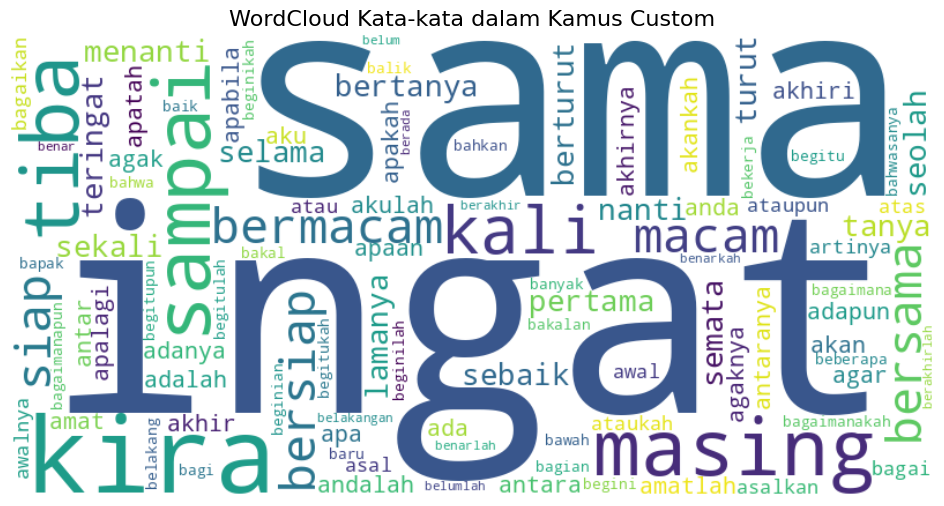


Isi kamus custom (50 kata pertama):
['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik']
... dan 708 kata lainnya.


In [ ]:
# Baca file kamus.txt
kamus_file_path = '/content/drive/Shareddrives/UAS BGDTMG data Source/kamus.txt'

try:
    with open(kamus_file_path, 'r', encoding='utf-8') as f:
        kamus_words = [line.strip() for line in f if line.strip()] # Baca kata per baris, hilangkan baris kosong
except Exception as e:
    print(f"Gagal memuat kamus.txt: {e}")
    kamus_words = []

if not kamus_words:
    print("Kamus stopword custom kosong atau gagal dimuat. Tidak dapat membuat visualisasi.")
else:
    # Hitung frekuensi setiap kata dalam kamus (jika ada duplikasi, meskipun seharusnya tidak ada)
    word_counts = Counter(kamus_words)

    # Buat DataFrame dari hasil hitungan
    kamus_df = pd.DataFrame(word_counts.items(), columns=['Kata', 'Frekuensi'])

    # Urutkan berdasarkan frekuensi (opsional, untuk visualisasi bar chart)
    kamus_df = kamus_df.sort_values(by='Frekuensi', ascending=False)

    print("\nVisualisasi isi kamus stopword custom:")

    kamus_text = " ".join(kamus_words)

    if kamus_text:
        try:
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',
                max_words=100, # Tampilkan hingga 100 kata terbanyak
                colormap='viridis',
                relative_scaling=0.5,
                min_font_size=10
            ).generate(kamus_text)

            plt.figure(figsize=(12, 6))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title('WordCloud Kata-kata dalam Kamus Custom', fontsize=16)
            plt.show()
        except Exception as e:
            print(f"Gagal membuat WordCloud: {e}")
    else:
        print("Tidak ada teks untuk membuat WordCloud dari kamus.")

    print("\nIsi kamus custom (50 kata pertama):")
    print(kamus_words[:50])
    print(f"... dan {len(kamus_words) - 50} kata lainnya.")

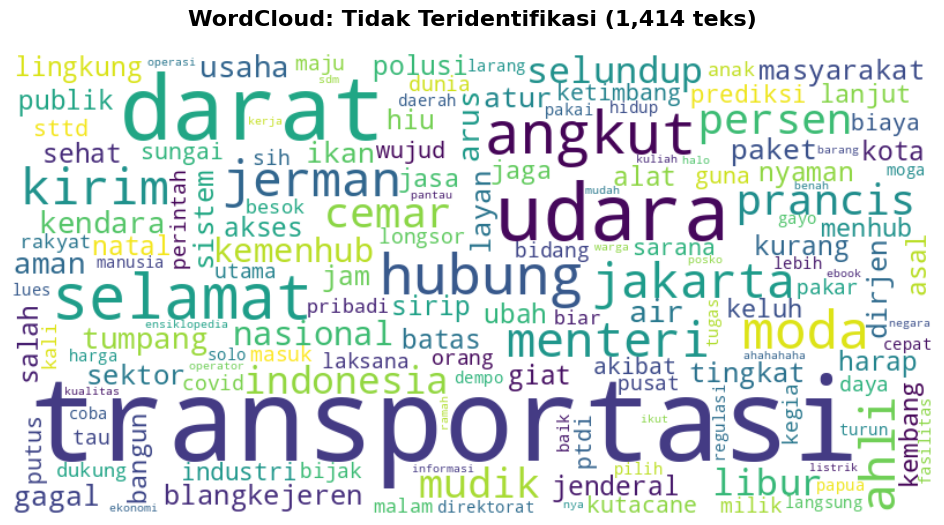

WordCloud untuk label 'tidak_teridentifikasi' ditampilkan.
Jumlah teks dalam label 'tidak_teridentifikasi': 1,414


In [ ]:
# Filter data untuk label 'tidak_teridentifikasi'
df_tidak_teridentifikasi = data_final[data_final['transport_label'] == 'tidak_teridentifikasi']

# Gabungkan semua teks yang berlabel 'tidak_teridentifikasi'
text_tidak_teridentifikasi = " ".join(df_tidak_teridentifikasi['text_processed_final'].dropna().astype(str))

# Buat objek WordCloud tanpa stopwords tambahan
wordcloud_tidak_teridentifikasi = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=150,
    # Tidak perlu menambahkan stopwords tambahan karena instruksi
    relative_scaling=0.5,
    min_font_size=10,
    max_font_size=100,
    collocations=False
).generate(text_tidak_teridentifikasi)

# Tampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tidak_teridentifikasi, interpolation='bilinear')
plt.title(f'WordCloud: Tidak Teridentifikasi ({len(df_tidak_teridentifikasi):,} teks)',
          fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.show()

print(f"WordCloud untuk label 'tidak_teridentifikasi' ditampilkan.")
print(f"Jumlah teks dalam label 'tidak_teridentifikasi': {len(df_tidak_teridentifikasi):,}")



GENERATING ENHANCED WORDCLOUD PER LABEL
Memuat custom stopwords dari file...
Berhasil memuat 758 kata dari /content/drive/Shareddrives/UAS BGDTMG data Source/kamus.txt
Berhasil memuat 1480 kata dari /content/drive/Shareddrives/UAS BGDTMG data Source/slang.csv
Berhasil memuat 757 stopwords NLTK Indonesia
Berhasil memuat 123 stopwords Sastrawi
Total stopwords yang unik: 2251


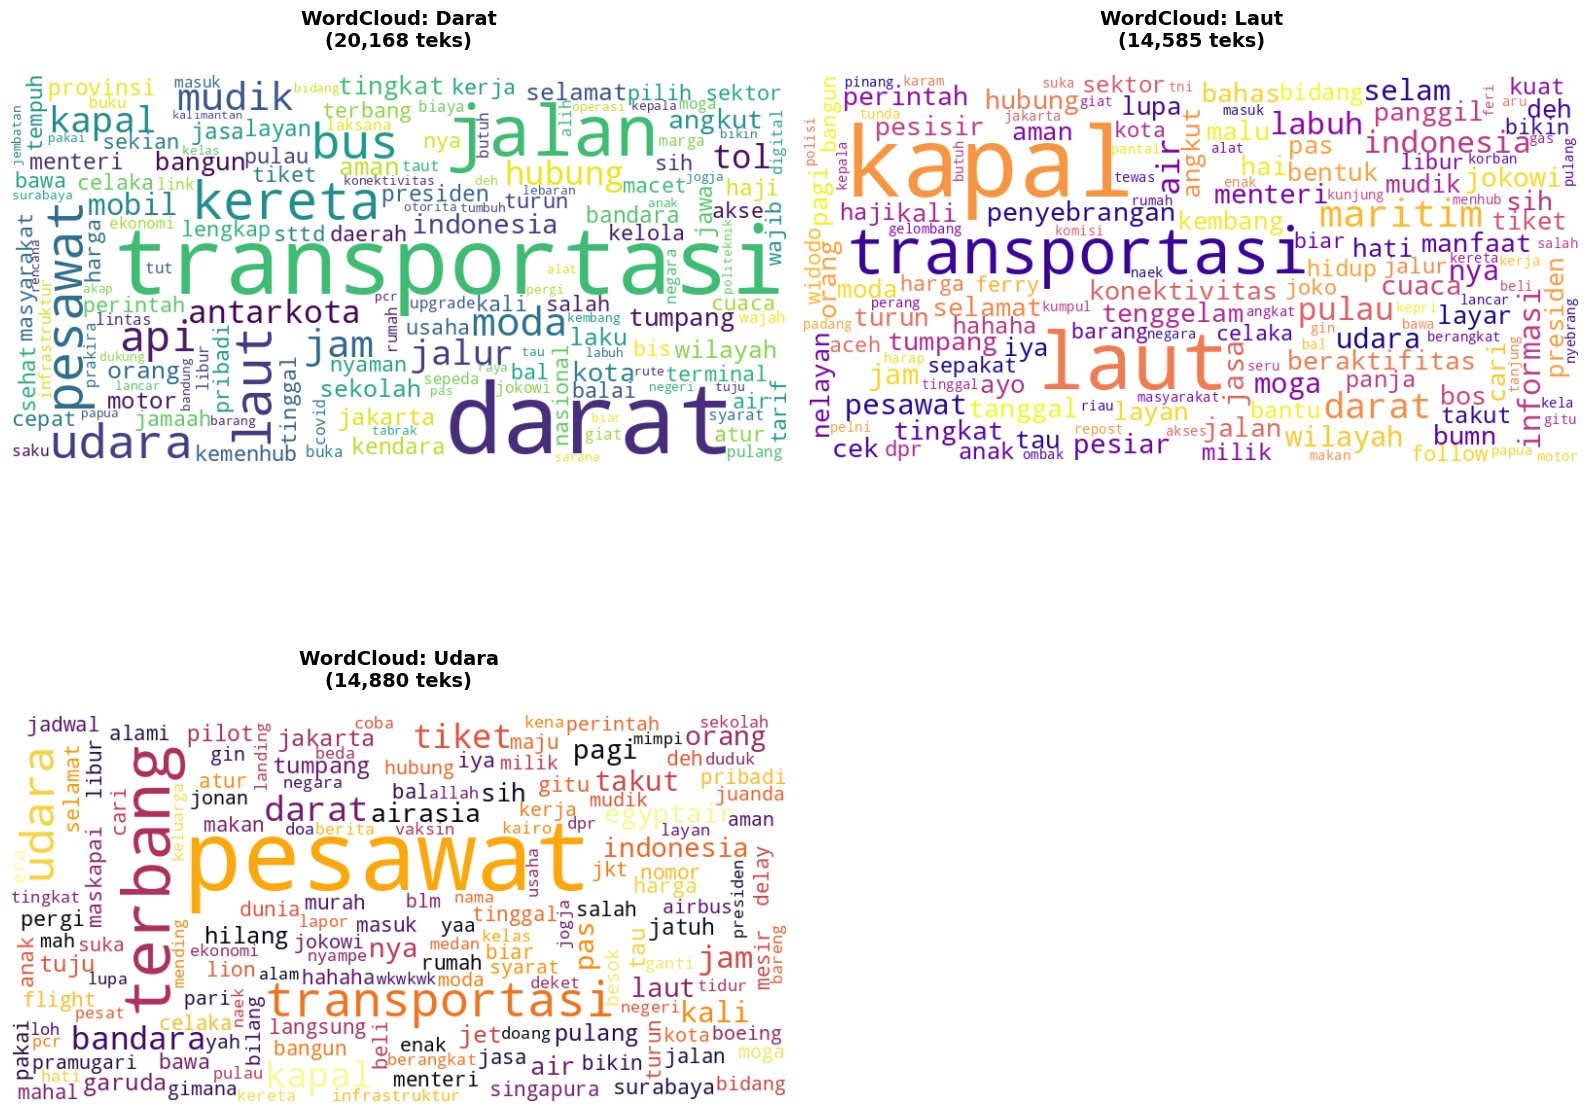


Custom stopwords digunakan: 2,251 kata
Stopwords sources: NLTK Indonesian + Sastrawi + Custom files + WordCloud specific


In [ ]:
# Menampilkan visualisasi stopword pada wordcloud untuk ke empat label
generate_enhanced_wordcloud_per_label(data_final, 'text_processed_final')

--------------------------------------------------


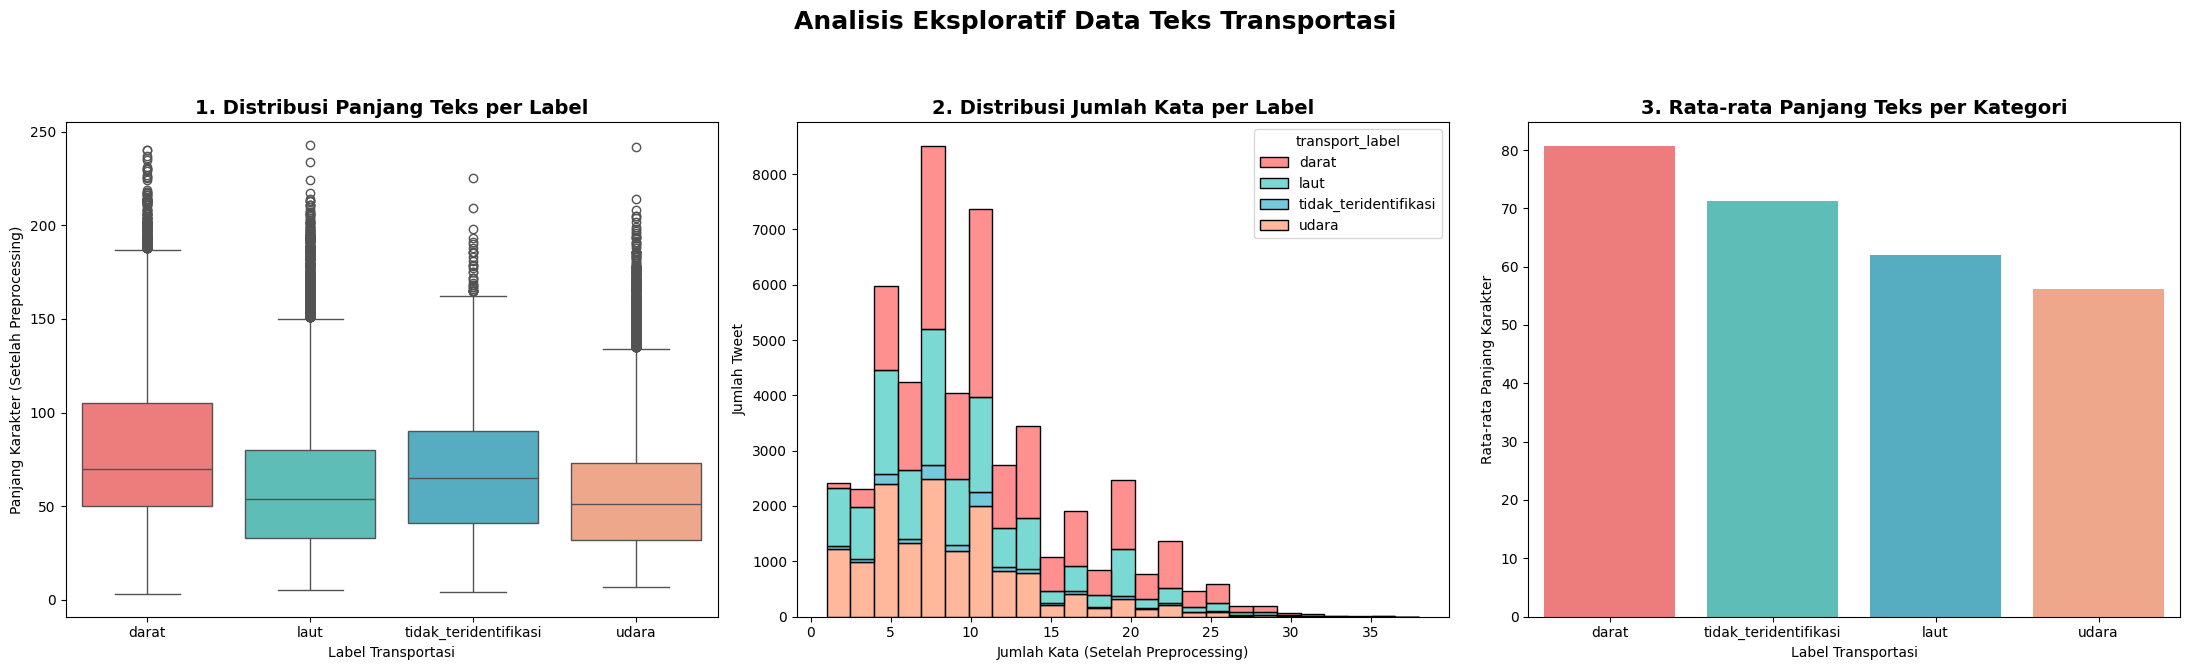

In [ ]:
print("-"*50)

plt.style.use('default')
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle('Analisis Eksploratif Data Teks Transportasi', fontsize=18, fontweight='bold')
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

# Use 'final_length' instead of 'enhanced_length'
sns.boxplot(data=data_final, x='transport_label', y='final_length', ax=axes[0], palette=colors)
axes[0].set_title('1. Distribusi Panjang Teks per Label', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label Transportasi')
axes[0].set_ylabel('Panjang Karakter (Setelah Preprocessing)')

# Use 'word_count_final' instead of 'enhanced_word_count'
sns.histplot(data=data_final, x='word_count_final', hue='transport_label', multiple="stack", ax=axes[1], bins=25, palette=colors)
axes[1].set_title('2. Distribusi Jumlah Kata per Label', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Jumlah Kata (Setelah Preprocessing)')
axes[1].set_ylabel('Jumlah Tweet')

# Use 'final_length' for grouping
avg_length = data_final.groupby('transport_label')['final_length'].mean().sort_values(ascending=False)
sns.barplot(x=avg_length.index, y=avg_length.values, ax=axes[2], palette=colors)
axes[2].set_title('3. Rata-rata Panjang Teks per Kategori', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Label Transportasi')
axes[2].set_ylabel('Rata-rata Panjang Karakter')

plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()

In [ ]:
# Tampilkan contoh hasil preprocessing per label
print("\nSampel hasil preprocessing per Label:")
labels = data_final['transport_label'].unique()
#(data_final, 'text_processed_final')
for label in labels:
    print(f"\n--- Sampel Label: {label} ---")
    label_data = data_final[data_final['transport_label'] == label].head(30)

    if not label_data.empty:
        for index, row in label_data.iterrows():
            print(f"\nOriginal: {row['full_text']}")
            print(f"Cleaned:  {row['text_processed_final']}")
            print(f"Label:    {row['transport_label']}")
    else:
        print(f"Tidak ada data untuk label {label} setelah preprocessing.")


Sampel hasil preprocessing per Label:

--- Sampel Label: darat ---

Original: TOBAT NAIK MODA TRANSPORTASI DARAT! WAKTU GAK BISA DIKALKULASIKAN. *supirnya PHP*
Cleaned:  tobat moda transportasi darat kalkulasi supirnya php
Label:    darat

Original: Sementara ini sampai batas waktu yg belum ditentukan saya nggak percaya sama jalur darat dg moda transportasi apapun selain @CommuterLine
Cleaned:  batas tentu percaya jalur darat moda transportasi apa
Label:    darat

Original: Supir maut! @insanedio Kereta api harusnya jadi moda transportasi paling aman di darat. Tapi berkat ... http://t.co/bHpRkWIvu5
Cleaned:  supir maut kereta api moda transportasi aman darat berkat
Label:    darat

Original: Kereta api masih menjadi andalan moda transportasi darat Pulau Jawa...penumpang dan rel yang sama
Cleaned:  kereta api andal moda transportasi darat pulau jawa tumpang rel
Label:    darat

Original: Terminal Pulogebang yang megah dan BKT disisi selatan bisa dikembangkan jd integrasi moda transport


Analisis Kata Teratas per Kategori (dari teks yang sudah bersih):

=== TOP WORDS - TRANSPORTASI DARAT ===


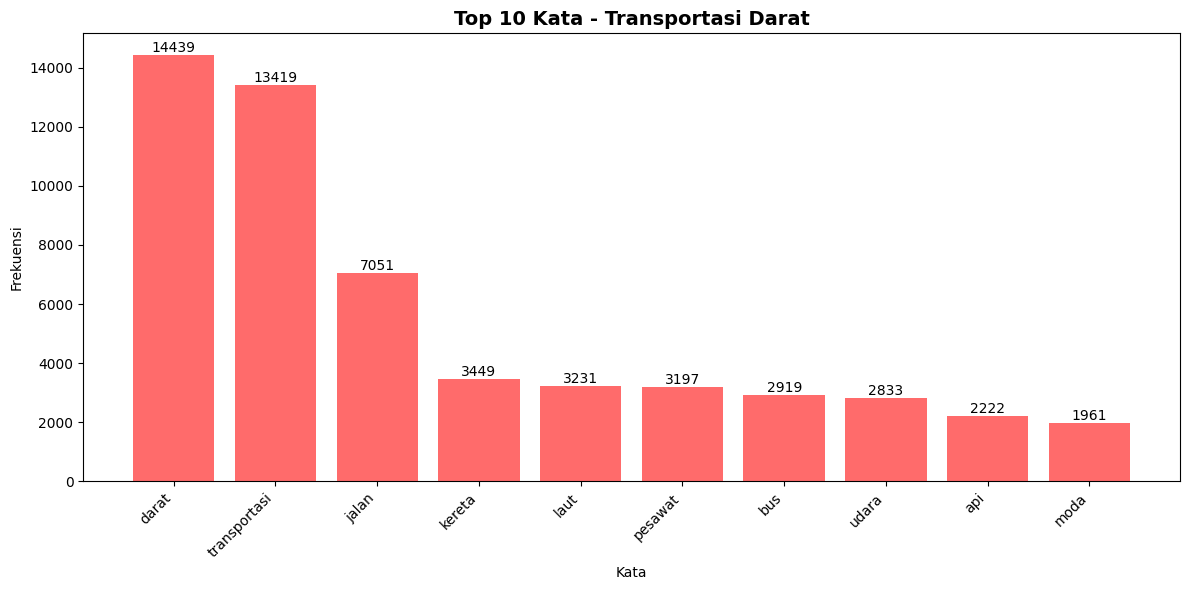


=== TOP WORDS - TRANSPORTASI LAUT ===


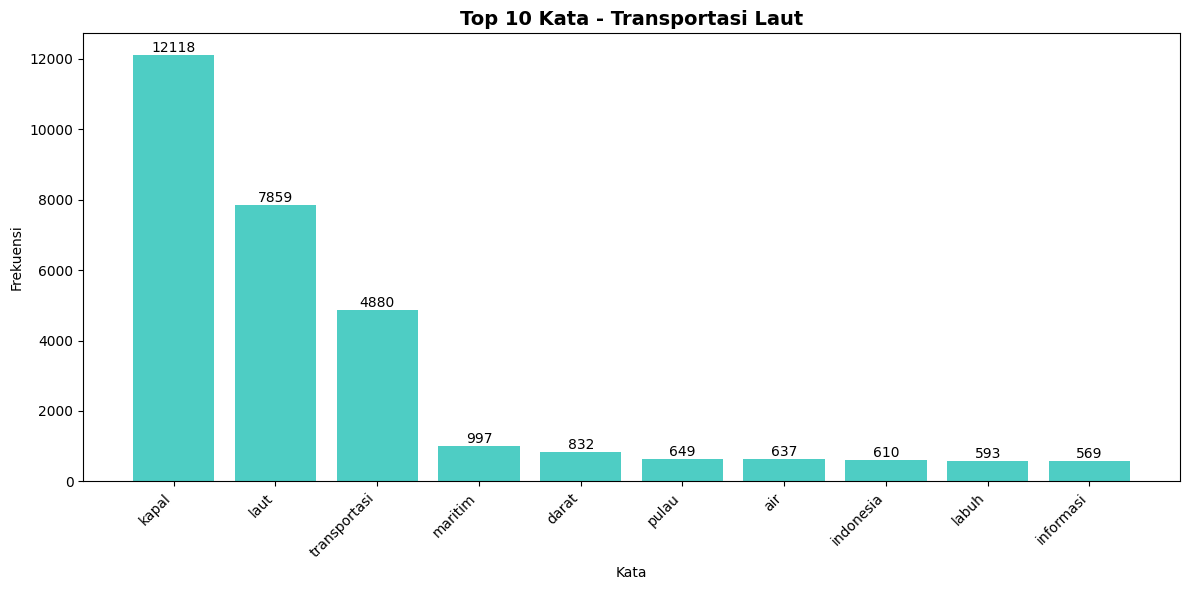


=== TOP WORDS - TRANSPORTASI TIDAK_TERIDENTIFIKASI ===


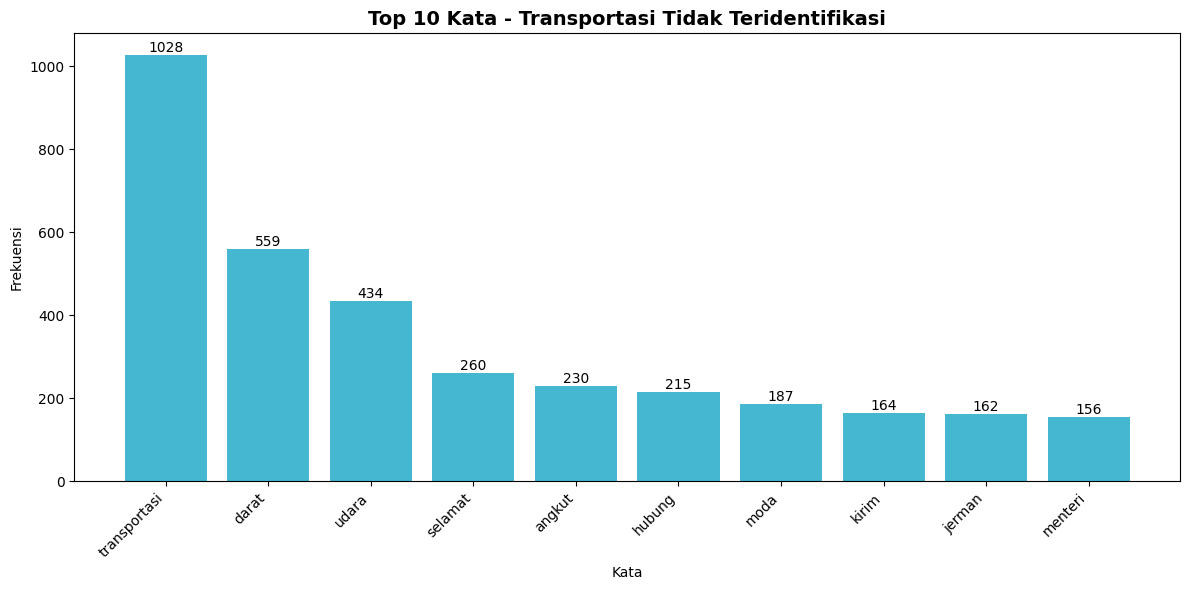


=== TOP WORDS - TRANSPORTASI UDARA ===


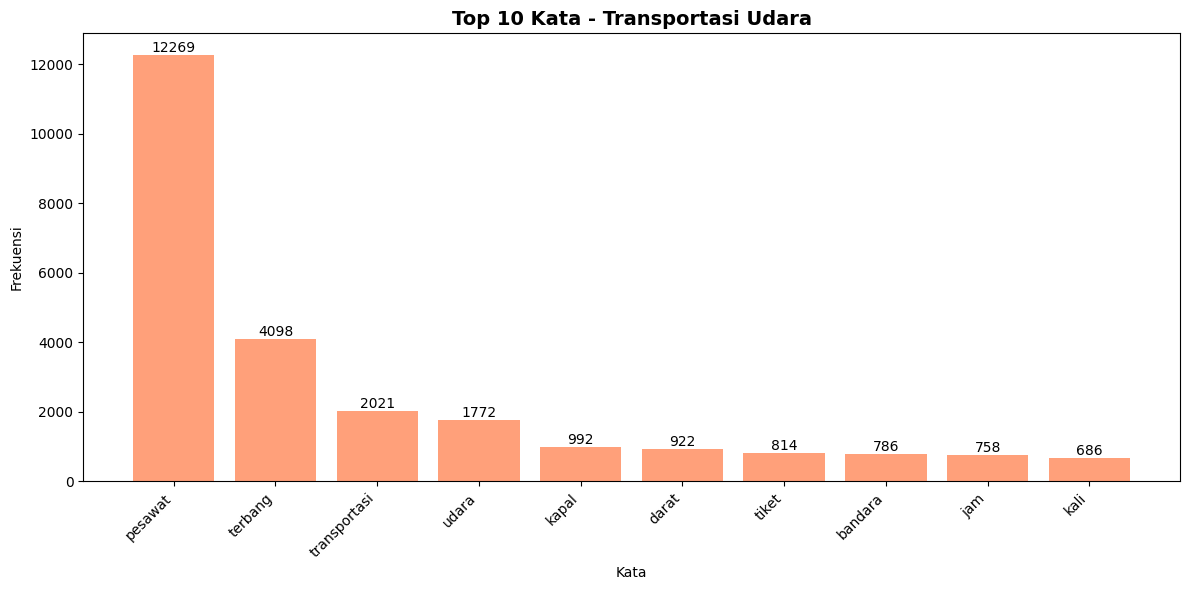

In [ ]:
# Analisis kata-kata paling sering muncul per kategori
def get_top_words(texts, n=10):
    "Mendapatkan kata-kata teratas dari kumpulan teks"
    all_words = ' '.join(texts).split()
    return Counter(all_words).most_common(n)

print("\nAnalisis Kata Teratas per Kategori (dari teks yang sudah bersih):")
categories = data_final['transport_label'].unique()

for i, category in enumerate(categories):
    print(f"\n=== TOP WORDS - TRANSPORTASI {category.upper()} ===")

    # --- BAGIAN YANG DIREVISI 2 ---
    # Mengambil data dari kolom 'text_processed_enhanced' yang sudah bebas stopwords
    category_texts = data_final[data_final['transport_label'] == category]['text_processed_final']

    if not category_texts.empty:
        top_words = get_top_words(category_texts, 15)
        if top_words:
            words, counts = zip(*top_words[:10])
            plt.figure(figsize=(12, 6))
            bars = plt.bar(words, counts, color=colors[i % len(colors)])
            plt.title(f'Top 10 Kata - Transportasi {category.replace("_", " ").title()}', fontsize=14, fontweight='bold')
            plt.xlabel('Kata')
            plt.ylabel('Frekuensi')
            plt.xticks(rotation=45, ha='right')
            for bar, count in zip(bars, counts):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count), ha='center', va='bottom', fontsize=10)
            plt.tight_layout()
            plt.show()

In [ ]:
# Statistik deskriptif
stats_df = data_final.groupby('transport_label').agg({
    # Use the correct column names created by the enhanced pipeline
    'final_length': ['mean', 'std', 'min', 'max'],
    'word_count_final': ['mean', 'std', 'min', 'max']
}).round(2)
print("\n\nStatistik Deskriptif Panjang Teks dan Jumlah Kata per Label:")
print(stats_df)



Statistik Deskriptif Panjang Teks dan Jumlah Kata per Label:
                      final_length                 word_count_final            \
                              mean    std min  max             mean   std min   
transport_label                                                                 
darat                        80.71  40.81   3  240            11.91  5.92   1   
laut                         61.95  40.53   5  243             9.43  5.79   1   
tidak_teridentifikasi        71.23  39.55   4  225            10.11  5.40   1   
udara                        56.11  33.96   7  242             8.51  5.12   1   

                           
                      max  
transport_label            
darat                  34  
laut                   38  
tidak_teridentifikasi  30  
udara                  36  


In [ ]:
# 4. EKSTRAKSI FITUR

print("\n\n4. FEATURE EXTRACTION")
print("-"*50)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Pembatasan fitur untuk efisiensi
    min_df=2,           # Kata harus muncul minimal 2 kali
    max_df=0.8,         # Maksimal 80% dokumen
    ngram_range=(1, 2), # Unigram dan bigram
    sublinear_tf=True   # Gunakan log scaling
)

# Fit dan transform
X_tfidf = tfidf_vectorizer.fit_transform(data_final['text_processed_final'])
y = data_final['transport_label']

print(f"Shape fitur TF-IDF: {X_tfidf.shape}")
print(f"Jumlah fitur: {X_tfidf.shape[1]}")
print(f"Jumlah sampel: {X_tfidf.shape[0]}")

# Tampilkan beberapa fitur teratas
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nContoh 10 fitur pertama: {feature_names[:10]}")

# Label encoding untuk neural networks
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"Label classes: {label_encoder.classes_}")

# Split data untuk model tradisional
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=42, stratify=y
)
print(f"\nTraining set: {X_train_tfidf.shape[0]} samples")
print(f"Test set: {X_test_tfidf.shape[0]} samples")

# Split data untuk neural networks (text sequences)
train_texts, test_texts, y_train_nn, y_test_nn = train_test_split(
    data_final['text_processed_final'], y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train_tfidf.shape[0]} samples")
print(f"Test set: {X_test_tfidf.shape[0]} samples")

# Tampilkan distribusi di train dan test set
print(f"\nDistribusi Training Set:")
train_dist = pd.Series(y_train).value_counts()
for label, count in train_dist.items():
    print(f"- {label}: {count}")

print(f"\nDistribusi Test Set:")
test_dist = pd.Series(y_test).value_counts()
for label, count in test_dist.items():
    print(f"- {label}: {count}")

# Dictionary untuk menyimpan hasil
results = {}
predictions = {}



4. FEATURE EXTRACTION
--------------------------------------------------
Shape fitur TF-IDF: (51047, 5000)
Jumlah fitur: 5000
Jumlah sampel: 51047

Contoh 10 fitur pertama: ['aaa' 'abad' 'abadi' 'abdi' 'abdullah' 'abis' 'abk' 'abu' 'acak' 'acara']
Label classes: ['darat' 'laut' 'tidak_teridentifikasi' 'udara']

Training set: 35732 samples
Test set: 15315 samples

Training set: 35732 samples
Test set: 15315 samples

Distribusi Training Set:
- darat: 14117
- udara: 10416
- laut: 10209
- tidak_teridentifikasi: 990

Distribusi Test Set:
- darat: 6051
- udara: 4464
- laut: 4376
- tidak_teridentifikasi: 424


Mengapa Naive Bayes dan Logistic Regression direkomendasikan?
1. Multinomial Naive Bayes
Dibuat khusus untuk data teks: Naive Bayes (Multinomial) bekerja sangat baik pada data berbasis frekuensi seperti TF-IDF atau Bag of Words.

Kecepatan dan efisiensi: Sangat cepat dilatih, cocok untuk jumlah data yang besar seperti 20K+ tweet.

Baseline yang kuat: Memberikan hasil memuaskan pada banyak tugas NLP sederhana.

2. Logistic Regression
Mudah ditafsirkan: Memberikan probabilitas prediksi, membantu memahami pengaruh fitur.

Performa bagus pada TF-IDF: Cocok untuk data sparse dan linier seperti representasi TF-IDF.

Stabil dan cepat: Latihan model cepat, tanpa overfitting ekstrem.

In [ ]:
# 5. MODEL DEVELOPMENT - NON-NEURAL NETWORKS
print("\n\n5. MODEL NON-NEURAL NETWORKS")
print("-"*50)

# Tuning Multinomial Naive Bayes
# Tentukan parameter yang akan diuji
params_nb = {
    'alpha': [0.1, 0.5, 0.8, 1.0, 1.2]
}

# Inisialisasi GridSearchCV
grid_nb = GridSearchCV(
    estimator=MultinomialNB(),
    param_grid=params_nb,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1 # Gunakan semua core CPU yang tersedia
)

# Latih model untuk mencari parameter terbaik
grid_nb.fit(X_train_tfidf, y_train)

# Tampilkan hasil tuning
print(f"\nParameter terbaik untuk Naive Bayes: {grid_nb.best_params_}")
print(f"Skor cross-validation terbaik: {grid_nb.best_score_:.4f}")

# Simpan model terbaik dan lakukan prediksi
nb_model = grid_nb.best_estimator_
nb_pred = nb_model.predict(X_test_tfidf)
predictions['Multinomial Naive Bayes'] = nb_pred

# Model 2: Tuning Logistic Regression
params_lr = [
    {
        'solver': ['lbfgs'],
        'multi_class': ['multinomial'],
        'C': [0.1, 1, 10, 100]
    },
    {
        'solver': ['liblinear'],
        'multi_class': ['ovr'],
        'C': [0.1, 1, 10, 100]
    }
]

# Inisialisasi GridSearchCV
grid_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=params_lr,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Latih model untuk mencari parameter terbaik
grid_lr.fit(X_train_tfidf, y_train)

# Tampilkan hasil tuning
print(f"\nParameter terbaik untuk Logistic Regression: {grid_lr.best_params_}")
print(f"Skor cross-validation terbaik: {grid_lr.best_score_:.4f}")

# Simpan model terbaik dan lakukan prediksi
lr_model = grid_lr.best_estimator_
lr_pred = lr_model.predict(X_test_tfidf)
predictions['Logistic Regression'] = lr_pred



5. MODEL NON-NEURAL NETWORKS
--------------------------------------------------
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Parameter terbaik untuk Naive Bayes: {'alpha': 1.2}
Skor cross-validation terbaik: 0.8724
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Parameter terbaik untuk Logistic Regression: {'C': 10, 'multi_class': 'ovr', 'solver': 'liblinear'}
Skor cross-validation terbaik: 0.9684


In [ ]:
# 7. EVALUATION - NON-NEURAL NETWORKS
print("\n\n7. EVALUATION - NON-NEURAL NETWORKS")
print("-"*50)

# Evaluation for Multinomial Naive Bayes
print("\n--- Evaluation: Multinomial Naive Bayes ---")
print("Classification Report:")
print(classification_report(y_test, predictions['Multinomial Naive Bayes']))

# Evaluation for Logistic Regression
print("\n--- Evaluation: Logistic Regression ---")
print("Classification Report:")
print(classification_report(y_test, predictions['Logistic Regression']))

# Store results
results['Multinomial Naive Bayes'] = {
    'accuracy': accuracy_score(y_test, predictions['Multinomial Naive Bayes']),
    'precision': precision_score(y_test, predictions['Multinomial Naive Bayes'], average='weighted'),
    'recall': recall_score(y_test, predictions['Multinomial Naive Bayes'], average='weighted'),
    'f1_score': f1_score(y_test, predictions['Multinomial Naive Bayes'], average='weighted')
}

results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, predictions['Logistic Regression']),
    'precision': precision_score(y_test, predictions['Logistic Regression'], average='weighted'),
    'recall': recall_score(y_test, predictions['Logistic Regression'], average='weighted'),
    'f1_score': f1_score(y_test, predictions['Logistic Regression'], average='weighted')
}



7. EVALUATION - NON-NEURAL NETWORKS
--------------------------------------------------

--- Evaluation: Multinomial Naive Bayes ---
Classification Report:
                       precision    recall  f1-score   support

                darat       0.86      0.89      0.87      6051
                 laut       0.92      0.87      0.89      4376
tidak_teridentifikasi       0.98      0.29      0.45       424
                udara       0.84      0.91      0.87      4464

             accuracy                           0.87     15315
            macro avg       0.90      0.74      0.77     15315
         weighted avg       0.88      0.87      0.87     15315


--- Evaluation: Logistic Regression ---
Classification Report:
                       precision    recall  f1-score   support

                darat       0.98      0.96      0.97      6051
                 laut       0.97      0.99      0.98      4376
tidak_teridentifikasi       0.94      0.83      0.88       424
                uda

Model Neural Network
 1. Bidirectional LSTM (BiLSTM) — REKOMENDASI UTAMA
 Kelebihan:
Memahami konteks kata dari dua arah (kiri & kanan)

Sangat baik untuk memahami hubungan antar kata dalam kalimat pendek seperti tweet

Bisa menangani kalimat ambigu yang umum di media sosial

 Arsitektur:
Embedding (Word2Vec/GloVe/FastText atau train sendiri)

Bidirectional LSTM (64–128 units)

Dropout (0.3–0.5)

Dense → Softmax (output untuk 3 kelas)

 Kenapa BiLSTM terbaik?
Punya akurasi tinggi pada teks pendek

Lebih presisi dalam menangani variasi bahasa dan konteks yang umum di media sosial

Tidak terlalu berat seperti Transformer

 2. 1D Convolutional Neural Network (CNN-Text)
 Kelebihan:
Cepat dilatih

Efisien untuk menangkap pola lokal (n-gram)

Sangat cocok untuk teks pendek

 Kapan dipakai?
Jika waktu komputasi terbatas

Untuk baseline cepat dari model neural

In [ ]:
# 6. MODEL DEVELOPMENT - NEURAL NETWORKS

print("\n\n6. MODEL NEURAL NETWORKS")
print("-"*50)
VOCAB_SIZE = 5000
MAX_LENGTH = 60

# Prepare tokenizer for neural networks
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(train_texts)
word_index = tokenizer.word_index

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(train_texts)
X_test_seq = tokenizer.texts_to_sequences(test_texts)

# Pad sequences
max_length = 60
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Encode labels for neural networks
y_train_encoded = label_encoder.fit_transform(y_train_nn)
y_test_encoded = label_encoder.transform(y_test_nn)

num_classes = len(label_encoder.classes_)
y_train_cat = to_categorical(y_train_encoded, num_classes)
y_test_cat = to_categorical(y_test_encoded, num_classes)

print(f"Neural network input shape: {X_train_pad.shape}")
print(f"Neural network output shape: {y_train_cat.shape}")
print(f"Number of classes: {num_classes}")



6. MODEL NEURAL NETWORKS
--------------------------------------------------
Neural network input shape: (35732, 60)
Neural network output shape: (35732, 4)
Number of classes: 4


In [ ]:
# --- Definisi Model CNN Best Konfigurasi---
print("Training CNN-1D Best Arsitektur")
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=60),
    Conv1D(filters=64, kernel_size=7, activation='relu', padding='same', kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    Conv1D(filters=32, kernel_size=5, activation='relu', padding='same', kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu', kernel_regularizer=l2(0.002)),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

cnn_model.compile(
    optimizer=AdamW(learning_rate=0.0005, weight_decay=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
cnn_model.summary()

# --- Callbacks---
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, verbose=1)

# --- Training Model ---
print("\nMemulai training CNN model...")
cnn_history = cnn_model.fit(
    X_train_pad, y_train_cat,
    epochs=20,
    batch_size=64,
    validation_split=0.2, # Menggunakan 20% dari data training untuk validasi
    verbose=1,
    callbacks=[
        early_stopping,
        reduce_lr
    ]
)

# --- Prediksi ---
cnn_pred_prob = cnn_model.predict(X_test_pad)
cnn_pred_encoded = np.argmax(cnn_pred_prob, axis=1)
predictions['CNN-1D'] = label_encoder.inverse_transform(cnn_pred_encoded)

Training CNN-1D Best Arsitektur


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Memulai training CNN model...
Epoch 1/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 38s 59ms/step - accuracy: 0.4200 - loss: 1.8505 - val_accuracy: 0.8616 - val_loss: 0.9258 - learning_rate: 5.0000e-04
Epoch 2/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.8696 - loss: 0.7100 - val_accuracy: 0.9212 - val_loss: 0.4792 - learning_rate: 5.0000e-04
Epoch 3/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.9205 - loss: 0.5124 - val_accuracy: 0.9302 - val_loss: 0.4088 - learning_rate: 5.0000e-04
Epoch 4/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9392 - loss: 0.4171 - val_accuracy: 0.9438 - val_loss: 0.3729 - learning_rate: 5.0000e-04
Epoch 5/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9509 - loss: 0.3442 - val_accuracy: 0.9520 - val_loss: 0.3367 - learning_rate: 5.0000e-04
Epoch 6/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.9625 - loss: 0.2843 - val_accuracy: 0.9551 - val_loss: 0.3040 - learning_rate: 5.0000e-04
Epoch 7/20
447/447 ━━

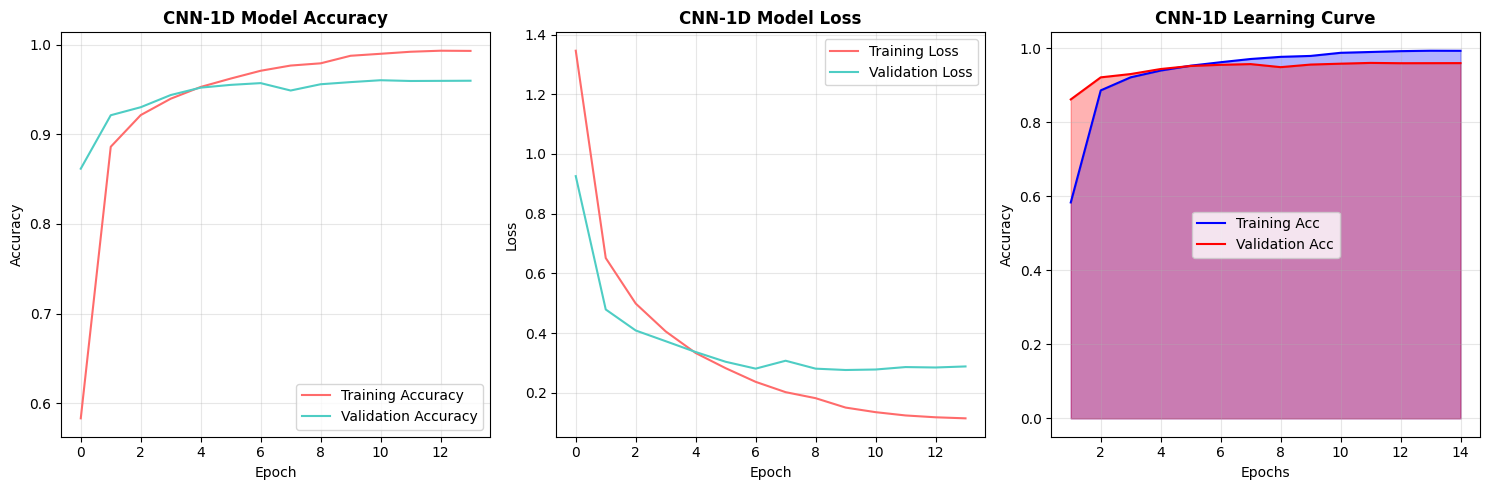

In [ ]:
# Plot training history untuk CNN-1D
plt.figure(figsize=(15, 5))

# Accuracy plot
plt.subplot(1, 3, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy', color='#FF6B6B')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy', color='#4ECDC4')
plt.title('CNN-1D Model Accuracy', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Loss plot
plt.subplot(1, 3, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss', color='#FF6B6B')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss', color='#4ECDC4')
plt.title('CNN-1D Model Loss', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Learning curve
plt.subplot(1, 3, 3)
epochs = range(1, len(cnn_history.history['accuracy']) + 1)
plt.plot(epochs, cnn_history.history['accuracy'], 'b-', label='Training Acc')
plt.plot(epochs, cnn_history.history['val_accuracy'], 'r-', label='Validation Acc')
plt.fill_between(epochs, cnn_history.history['accuracy'], alpha=0.3, color='blue')
plt.fill_between(epochs, cnn_history.history['val_accuracy'], alpha=0.3, color='red')
plt.title('CNN-1D Learning Curve', fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("Training BiLSTM Best Arsitektur...")

# --- Definisikan Callbacks ---

# Mengurangi learning rate saat performa mandek
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-5,
    verbose=1
)

# Menghentikan training jika tidak ada kemajuan
# Kita beri patience lebih agar memberi kesempatan pada LR baru
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=4,
    restore_best_weights=True,
    verbose=1
)

bilstm_model = Sequential([
    # Embedding layer
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),

    # Bidirectional LSTM layers
    Bidirectional(LSTM(32, dropout=0.5, recurrent_dropout=0.5, return_sequences=True, kernel_regularizer=l2(0.005))),
    GlobalMaxPooling1D(),

    # Dense layers
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

bilstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nBidirectional LSTM Model Architecture:")
bilstm_model.summary()

# Train BiLSTM
bilstm_history = bilstm_model.fit(
    X_train_pad, y_train_cat,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

# BiLSTM Predictions
bilstm_pred_prob = bilstm_model.predict(X_test_pad)
bilstm_pred_encoded = np.argmax(bilstm_pred_prob, axis=1)
bilstm_pred = label_encoder.inverse_transform(bilstm_pred_encoded)
predictions['BiLSTM'] = bilstm_pred

Training BiLSTM Best Arsitektur...

Bidirectional LSTM Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 70s 134ms/step - accuracy: 0.5525 - loss: 1.3230 - val_accuracy: 0.9053 - val_loss: 0.3439 - learning_rate: 0.0010
Epoch 2/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 57s 128ms/step - accuracy: 0.8802 - loss: 0.4374 - val_accuracy: 0.9172 - val_loss: 0.2660 - learning_rate: 0.0010
Epoch 3/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 82s 129ms/step - accuracy: 0.9016 - loss: 0.3339 - val_accuracy: 0.9242 - val_loss: 0.2393 - learning_rate: 0.0010
Epoch 4/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 82s 129ms/step - accuracy: 0.9165 - loss: 0.2836 - val_accuracy: 0.9345 - val_loss: 0.2220 - learning_rate: 0.0010
Epoch 5/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 82s 129ms/step - accuracy: 0.9268 - loss: 0.2552 - val_accuracy: 0.9379 - val_loss: 0.2232 - learning_rate: 0.0010
Epoch 6/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 82s 129ms/step - accuracy: 0.9321 - loss: 0.2337 - val_accuracy: 0.9438 - val_loss: 0.2196 - learning_rate: 0.0010
Epoch 7/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 58s 129ms/step - accuracy: 0.9

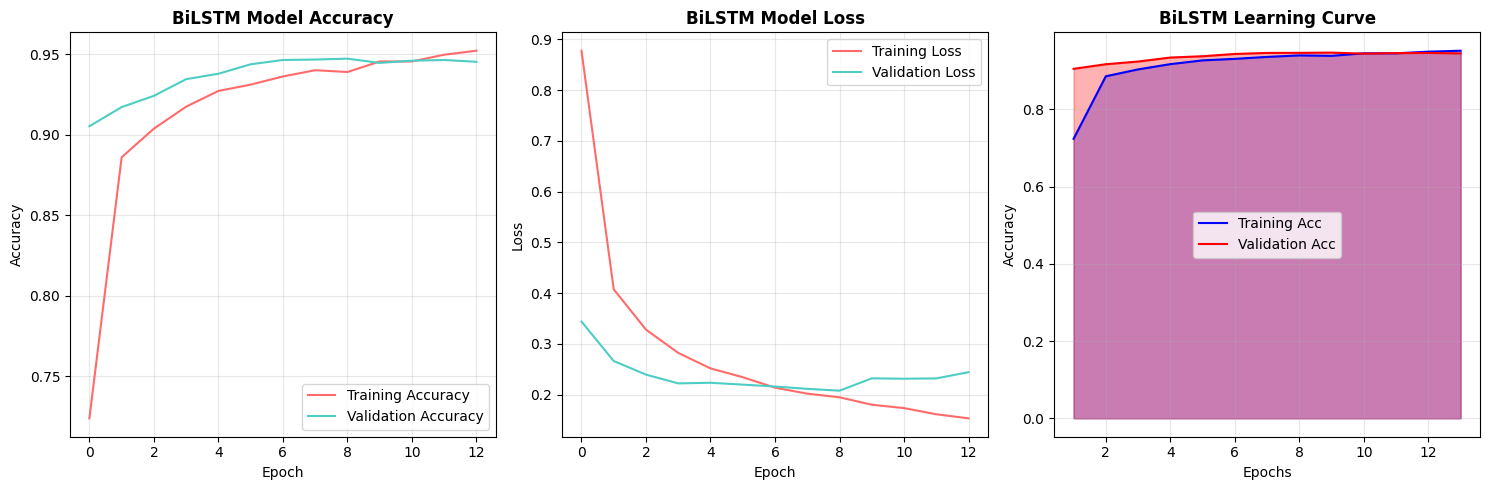

In [ ]:
# Plot training history untuk BiLSTM
plt.figure(figsize=(15, 5))

# Accuracy plot
plt.subplot(1, 3, 1)
plt.plot(bilstm_history.history['accuracy'], label='Training Accuracy', color='#FF6B6B')
plt.plot(bilstm_history.history['val_accuracy'], label='Validation Accuracy', color='#4ECDC4')
plt.title('BiLSTM Model Accuracy', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Loss plot
plt.subplot(1, 3, 2)
plt.plot(bilstm_history.history['loss'], label='Training Loss', color='#FF6B6B')
plt.plot(bilstm_history.history['val_loss'], label='Validation Loss', color='#4ECDC4')
plt.title('BiLSTM Model Loss', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Learning curve
plt.subplot(1, 3, 3)
epochs = range(1, len(bilstm_history.history['accuracy']) + 1)
plt.plot(epochs, bilstm_history.history['accuracy'], 'b-', label='Training Acc')
plt.plot(epochs, bilstm_history.history['val_accuracy'], 'r-', label='Validation Acc')
plt.fill_between(epochs, bilstm_history.history['accuracy'], alpha=0.3, color='blue')
plt.fill_between(epochs, bilstm_history.history['val_accuracy'], alpha=0.3, color='red')
plt.title('BiLSTM Learning Curve', fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# 7. MODEL EVALUATION

print("\n\n7. EVALUASI MODEL")
print("-"*50)

def evaluate_model(y_true, y_pred, model_name):
    """Evaluasi model dengan berbagai metrik"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    print(f"\n{model_name}:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")

    return accuracy, precision, recall, f1

# Evaluate all models
evaluate_model(y_test, predictions['Multinomial Naive Bayes'], 'Multinomial Naive Bayes')
evaluate_model(y_test, predictions['Logistic Regression'], 'Logistic Regression')
evaluate_model(y_test_nn, predictions['CNN-1D'], 'CNN-1D')
evaluate_model(y_test_nn, predictions['BiLSTM'], 'BiLSTM')




7. EVALUASI MODEL
--------------------------------------------------

Multinomial Naive Bayes:
   Accuracy:  0.8723
   Precision: 0.8764
   Recall:    0.8723
   F1-Score:  0.8684

Logistic Regression:
   Accuracy:  0.9705
   Precision: 0.9705
   Recall:    0.9705
   F1-Score:  0.9703

CNN-1D:
   Accuracy:  0.9618
   Precision: 0.9618
   Recall:    0.9618
   F1-Score:  0.9618

BiLSTM:
   Accuracy:  0.9495
   Precision: 0.9495
   Recall:    0.9495
   F1-Score:  0.9489


(0.9494613124387855, 0.949480266516211, 0.9494613124387855, 0.9489379165387244)

In [ ]:
# Demo Interface untuk Klasifikasi Transportasi

def predict_transport_type(text):
    """
    Fungsi untuk memprediksi jenis transportasi dari teks input
    menggunakan model yang sudah dilatih
    """
    try:
        # Preprocessing teks input
        processed_text = enhanced_preprocess_text(text)
        processed_text = fix_word_separation(processed_text)

        # Load custom stopwords
        custom_stopwords = load_custom_stopwords(kamus_file_path, slang_file_path)
        processed_text = remove_stopwords_indonesian(processed_text, custom_stopwords)
        processed_text = apply_sastrawi_stemming(processed_text)

        # Final cleaning
        processed_text = ' '.join(processed_text.split()) if processed_text else ''

        if not processed_text:
            return None

        # Prediksi menggunakan semua model
        predictions_result = {}
        confidences = {}
        all_probabilities = {}

        # 1. TF-IDF based models (Naive Bayes & Logistic Regression)
        text_tfidf = tfidf_vectorizer.transform([processed_text])

        # Naive Bayes
        nb_pred = nb_model.predict(text_tfidf)[0]
        nb_prob = nb_model.predict_proba(text_tfidf)[0]
        nb_confidence = max(nb_prob)

        # Get class names for probability mapping
        nb_classes = nb_model.classes_
        nb_prob_dict = dict(zip(nb_classes, nb_prob))

        predictions_result['Multinomial Naive Bayes'] = nb_pred
        confidences['Multinomial Naive Bayes'] = nb_confidence
        all_probabilities['Multinomial Naive Bayes'] = nb_prob_dict

        # Logistic Regression
        lr_pred = lr_model.predict(text_tfidf)[0]
        lr_prob = lr_model.predict_proba(text_tfidf)[0]
        lr_confidence = max(lr_prob)

        lr_classes = lr_model.classes_
        lr_prob_dict = dict(zip(lr_classes, lr_prob))

        predictions_result['Logistic Regression'] = lr_pred
        confidences['Logistic Regression'] = lr_confidence
        all_probabilities['Logistic Regression'] = lr_prob_dict

        # 2. Neural Network models
        # Tokenize and pad for neural networks
        text_seq = tokenizer.texts_to_sequences([processed_text])
        text_pad = pad_sequences(text_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

        # CNN prediction
        cnn_prob = cnn_model.predict(text_pad, verbose=0)[0]
        cnn_pred_encoded = np.argmax(cnn_prob)
        cnn_pred = label_encoder.inverse_transform([cnn_pred_encoded])[0]
        cnn_confidence = max(cnn_prob)

        # Map probabilities to class names for CNN
        cnn_classes = label_encoder.classes_
        cnn_prob_dict = dict(zip(cnn_classes, cnn_prob))

        predictions_result['CNN-1D'] = cnn_pred
        confidences['CNN-1D'] = cnn_confidence
        all_probabilities['CNN-1D'] = cnn_prob_dict

        # BiLSTM prediction
        bilstm_prob = bilstm_model.predict(text_pad, verbose=0)[0]
        bilstm_pred_encoded = np.argmax(bilstm_prob)
        bilstm_pred = label_encoder.inverse_transform([bilstm_pred_encoded])[0]
        bilstm_confidence = max(bilstm_prob)

        # Map probabilities to class names for BiLSTM
        bilstm_prob_dict = dict(zip(cnn_classes, bilstm_prob))

        predictions_result['BiLSTM'] = bilstm_pred
        confidences['BiLSTM'] = bilstm_confidence
        all_probabilities['BiLSTM'] = bilstm_prob_dict

        # Ensemble prediction (voting)
        from collections import Counter
        all_predictions = list(predictions_result.values())
        vote_counts = Counter(all_predictions)

        # Get majority vote
        majority_pred = vote_counts.most_common(1)[0][0]

        result = {
            'original_text': text,
            'preprocessed_text': processed_text,
            'predictions': predictions_result,
            'confidences': confidences,
            'probabilities': all_probabilities,
            'vote_counts': vote_counts,
            'majority_prediction': majority_pred
        }

        return result

    except Exception as e:
        print(f"Error dalam prediksi: {str(e)}")
        return None

def demo_transport_classification():
    """
    Demo interface untuk klasifikasi transportasi dengan format output yang diminta
    """
    print("============================================================")
    print("           TRANSPORT CLASSIFICATION ANALYZER")
    print("        Analisis Tweet tentang Moda Transportasi")
    print("            (Darat, Laut, Udara)")
    print("============================================================")

    while True:
        try:
            # Input tweet
            tweet = input("\nMasukkan tweet yang ingin dianalisis: ").strip()

            if not tweet:
                print("Tweet tidak boleh kosong!")
                continue

            print("\nMenganalisis tweet...")

            # Get prediction
            result = predict_transport_type(tweet)

            if result:
                print("============================================================")
                print("                    HASIL ANALISIS")
                print("============================================================")
                print(f" Tweet Asli: {result['original_text']}")
                print(f" Setelah Preprocessing: {result['preprocessed_text']}")
                print(" HASIL PREDIKSI:")
                print("----------------------------------------")

                # Display detailed results for each model
                models = ['Multinomial Naive Bayes', 'Logistic Regression', 'CNN-1D', 'BiLSTM']

                for model_name in models:
                    if model_name in result['predictions']:
                        pred = result['predictions'][model_name]
                        conf = result['confidences'][model_name]
                        probs = result['probabilities'][model_name]

                        print(f" {model_name}:")
                        print(f"    Prediksi: {pred.upper()}")
                        print(f"    Confidence: {conf:.4f}")
                        print("  Detail Probabilitas:")

                        # Sort probabilities in descending order
                        sorted_probs = sorted(probs.items(), key=lambda x: x[1], reverse=True)
                        for class_name, prob in sorted_probs:
                            print(f"      - {class_name}: {prob*100:.2f}%")
                        print()

                # Ringkasan konsensus
                print(" RINGKASAN KONSENSUS:")
                print("-------------------------")

                vote_counts = result['vote_counts']
                total_models = len(result['predictions'])

                for class_name, count in vote_counts.most_common():
                    print(f"   {class_name}: {count}/{total_models} model")

                print(f" PREDIKSI FINAL (Mayoritas): {result['majority_prediction'].upper()}")
                print("============================================================")

            else:
                print(" Gagal menganalisis tweet. Silakan coba lagi.")

        except KeyboardInterrupt:
            print("\n\nDemo dihentikan oleh pengguna.")
            break
        except Exception as e:
            print(f"\n Error: {str(e)}")
            print("Silakan coba lagi.")

        # Ask to continue
        print(" Ingin menganalisis tweet lain?")
        continue_choice = input("   Pilihan (y/n): ").lower().strip()
        if continue_choice not in ['y', 'yes', 'ya']:
            break

    print(" Terima kasih telah menggunakan Transport Classification Analyzer!")
    print("   Semoga bermanfaat untuk analisis transportasi Anda!")

# Fungsi untuk menjalankan demo
def start_transport_demo():
    """
    Fungsi utama untuk menjalankan demo
    """
    try:
        # Check if models are loaded
        required_models = ['nb_model', 'lr_model', 'cnn_model', 'bilstm_model', 'tfidf_vectorizer', 'tokenizer', 'label_encoder']
        missing_models = []

        for model_name in required_models:
            if model_name not in globals():
                missing_models.append(model_name)

        if missing_models:
            print(f"  Model belum dilatih: {', '.join(missing_models)}")
            print(" Pastikan Anda sudah menjalankan semua tahap training model.")
            return

        print(" Semua model berhasil dimuat!")
        demo_transport_classification()

    except Exception as e:
        print(f" Error saat memulai demo: {str(e)}")
        print(" Pastikan semua model sudah dilatih dan variabel tersedia.")

# Jalankan demo jika file dieksekusi langsung
if __name__ == "__main__":
    start_transport_demo()

 Semua model berhasil dimuat!
           TRANSPORT CLASSIFICATION ANALYZER
        Analisis Tweet tentang Moda Transportasi
            (Darat, Laut, Udara)

Masukkan tweet yang ingin dianalisis: Pemakai Garuda Indonesia Beralih ke Moda Transportasi Darat

Menganalisis tweet...
Memuat custom stopwords dari file...
Berhasil memuat 758 kata dari /content/drive/Shareddrives/UAS BGDTMG data Source/kamus.txt
Berhasil memuat 1480 kata dari /content/drive/Shareddrives/UAS BGDTMG data Source/slang.csv
Berhasil memuat 757 stopwords NLTK Indonesia
Berhasil memuat 123 stopwords Sastrawi
Total stopwords yang unik: 2251
                    HASIL ANALISIS
 Tweet Asli: Pemakai Garuda Indonesia Beralih ke Moda Transportasi Darat
 Setelah Preprocessing: pakai garuda indonesia alih moda transportasi darat
 HASIL PREDIKSI:
----------------------------------------
 Multinomial Naive Bayes:
    Prediksi: UDARA
    Confidence: 0.7819
  Detail Probabilitas:
      - udara: 78.19%
      - darat: 20.77%
      -

In [ ]:
# 8. HASIL KOMPARASI DAN VISUALISASI

print("\n\n8. PERBANDINGAN HASIL")
print("-"*50)

# Create comparison DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("Model Performance Comparison:")
print("="*60)
print(results_df.to_string())



8. PERBANDINGAN HASIL
--------------------------------------------------
Model Performance Comparison:
                         Accuracy  Precision  Recall  F1-Score
Multinomial Naive Bayes    0.8723     0.8764  0.8723    0.8684
Logistic Regression        0.9705     0.9705  0.9705    0.9703
CNN-1D                     0.9645     0.9645  0.9645    0.9645
BiLSTM                     0.9531     0.9530  0.9531    0.9524


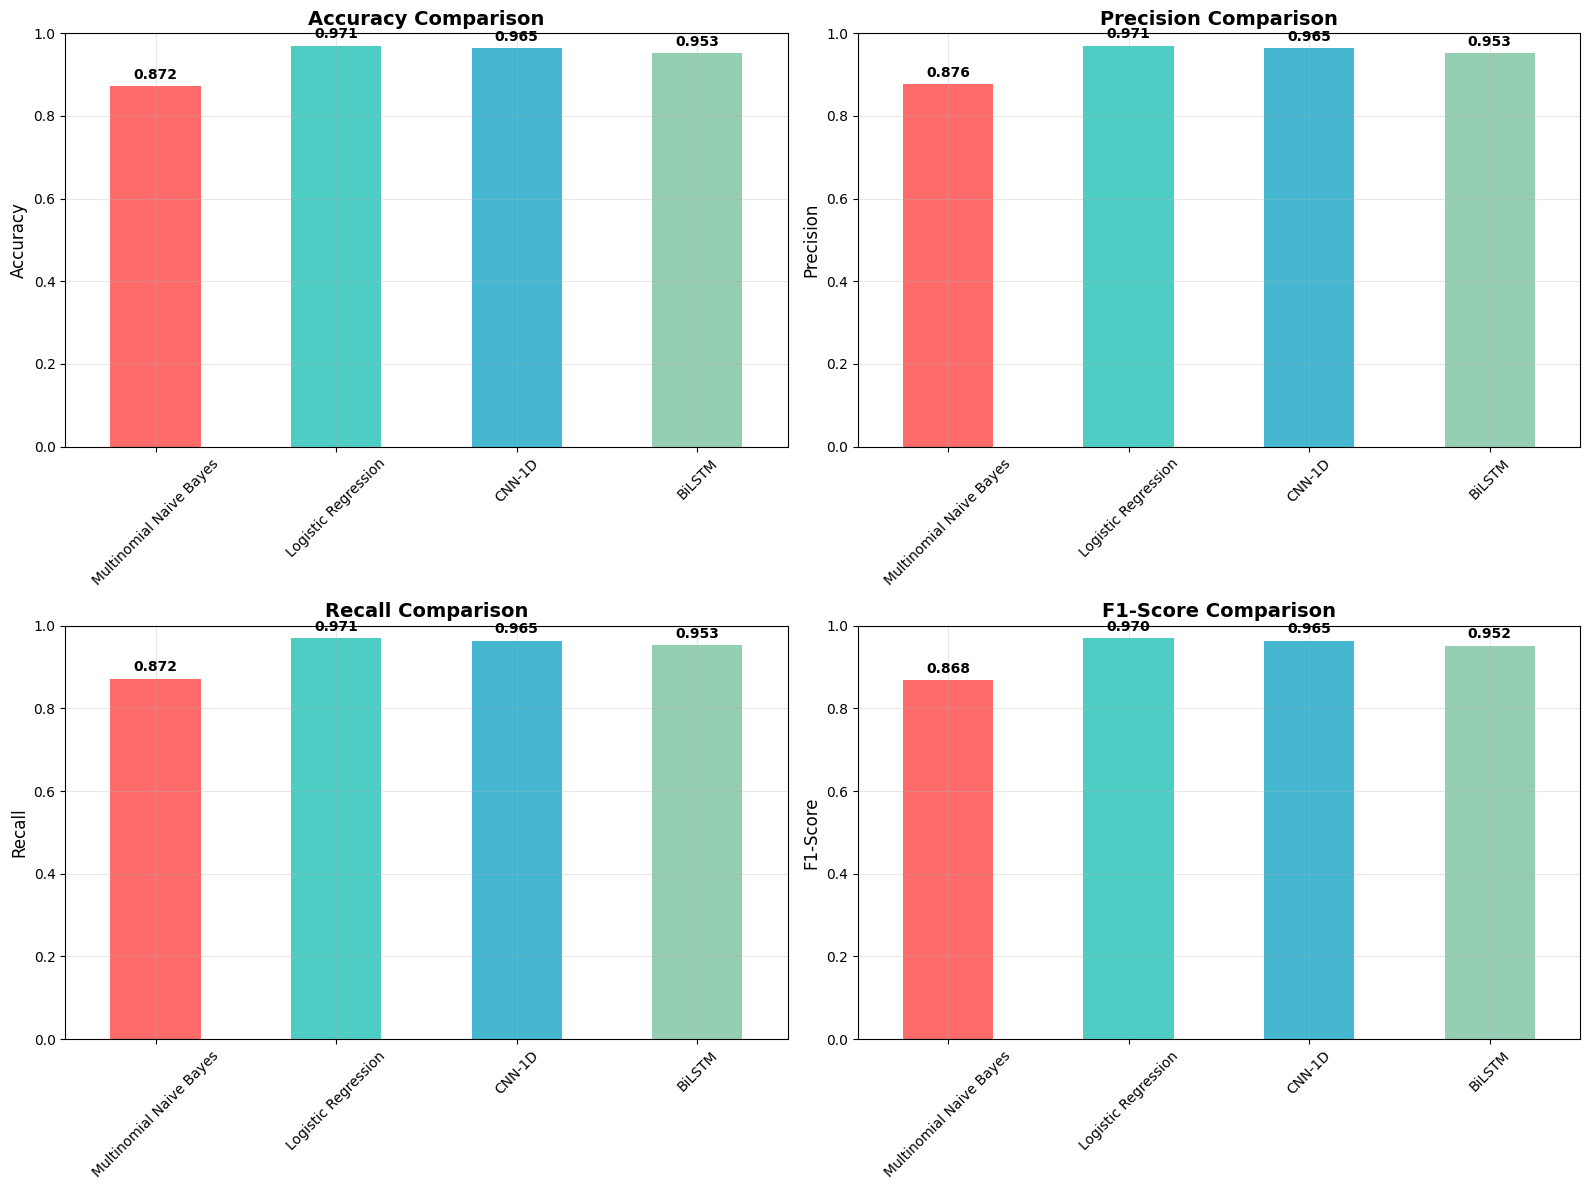

In [ ]:
# Visualisasi perbandingan
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    bars = results_df[metric].plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1)

    # Tambahkan nilai di atas bar
    for j, (name, value) in enumerate(results_df[metric].items()):
        ax.text(j, value + 0.01, f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

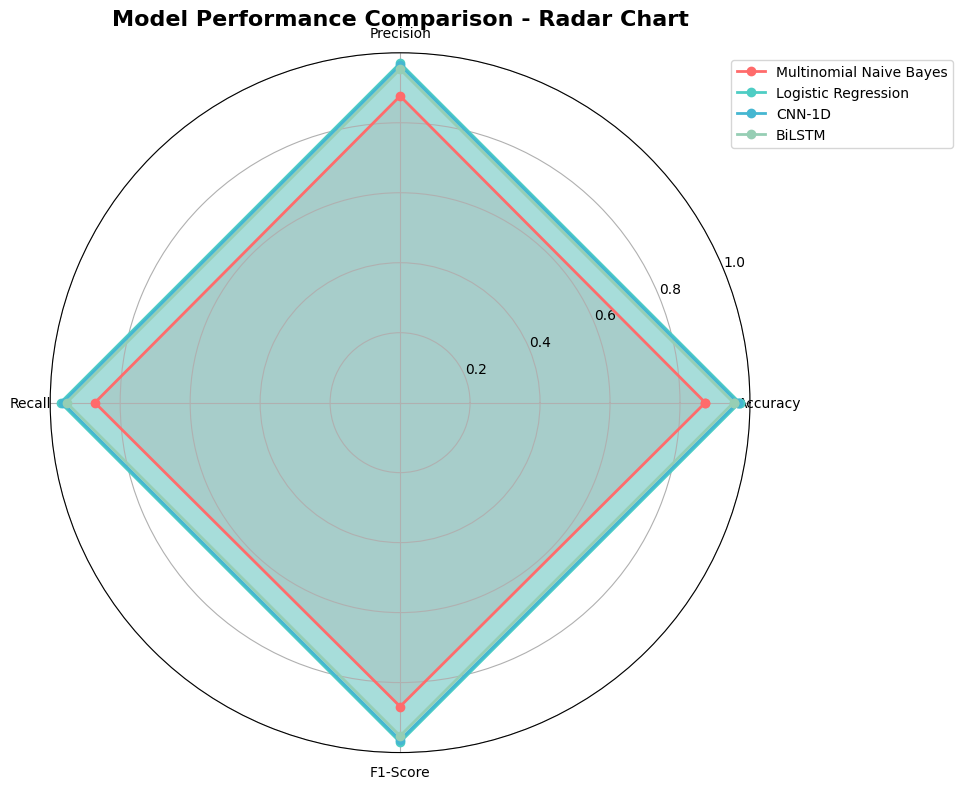

In [ ]:
# Radar chart untuk perbandingan
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='polar')

angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

for i, model in enumerate(results_df.index):
    values = results_df.loc[model].tolist()
    values += values[:1]  # Complete the circle

    ax.plot(angles, values, 'o-', linewidth=2, label=model, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.set_title('Model Performance Comparison - Radar Chart', size=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# 9. DETAILED ANALYSIS

print("\n\n9. ANALISIS DETAIL")
print("-"*50)

# Model terbaik
best_model_name = results_df['Accuracy'].idxmax()
best_accuracy = results_df.loc[best_model_name, 'Accuracy']

print(f"Model terbaik: {best_model_name}")
print(f" Accuracy terbaik: {best_accuracy:.4f}")

# Confusion Matrix untuk model terbaik
best_pred = predictions[best_model_name]

# Adjust y_test untuk model terbaik
if best_model_name in ['BiLSTM', 'CNN-1D','Multinomial Naive Bayes', 'Logistic Regression']:
    y_test_adjusted = y_test_nn
else:
    y_test_adjusted = y_test

# Classification Report
print(f"\nClassification Report - {best_model_name}:")
print("="*60)
print(classification_report(y_test_adjusted, best_pred))

# Analisis per kelas
print(f"\n Analisis Per Kelas - {best_model_name}:")
print("="*50)
for class_name in label_encoder.classes_:
    class_precision = precision_score(y_test_adjusted, best_pred, labels=[class_name], average=None)[0]
    class_recall = recall_score(y_test_adjusted, best_pred, labels=[class_name], average=None)[0]
    class_f1 = f1_score(y_test_adjusted, best_pred, labels=[class_name], average=None)[0]

    print(f"{class_name}:")
    print(f"  Precision: {class_precision:.4f}")
    print(f"  Recall:    {class_recall:.4f}")
    print(f"  F1-Score:  {class_f1:.4f}")



9. ANALISIS DETAIL
--------------------------------------------------
Model terbaik: Logistic Regression
 Accuracy terbaik: 0.9705

Classification Report - Logistic Regression:
                       precision    recall  f1-score   support

                darat       0.98      0.96      0.97      6051
                 laut       0.97      0.99      0.98      4376
tidak_teridentifikasi       0.94      0.83      0.88       424
                udara       0.96      0.98      0.97      4464

             accuracy                           0.97     15315
            macro avg       0.96      0.94      0.95     15315
         weighted avg       0.97      0.97      0.97     15315


 Analisis Per Kelas - Logistic Regression:
darat:
  Precision: 0.9787
  Recall:    0.9628
  F1-Score:  0.9707
laut:
  Precision: 0.9705
  Recall:    0.9854
  F1-Score:  0.9779
tidak_teridentifikasi:
  Precision: 0.9363
  Recall:    0.8325
  F1-Score:  0.8814
udara:
  Precision: 0.9626
  Recall:    0.9794
  F1-Sc

KESIMPULAN DAN ELABORASI UNTUK DI BAHAS DI LAMPORAN, SETELAH ITU CODE DI HAPUS.

In [ ]:
# 10. KESIMPULAN DAN ELABORASI HASIL

# Analisis mengapa hasil seperti ini
if best_accuracy > 0.8:
    print(" PERFORMA TINGGI (>80%):")
    print("   - Data memiliki karakteristik yang cukup berbeda antar kelas")
    print("   - Preprocessing efektif menghilangkan noise")
    print("   - Feature extraction TF-IDF menangkap pola linguistik dengan baik")
elif best_accuracy > 0.6:
    print("  PERFORMA SEDANG (60-80%):")
    print("   - Ada overlap karakteristik antar kelas transportasi")
    print("   - Beberapa tweet mungkin ambiguous dalam konteks")
    print("   - Ukuran dataset mungkin perlu ditingkatkan")
else:
    print(" PERFORMA RENDAH (<60%):")
    print("   - Dataset mungkin tidak seimbang")
    print("   - Preprocessing perlu perbaikan")


 PERFORMA TINGGI (>80%):
   - Data memiliki karakteristik yang cukup berbeda antar kelas
   - Preprocessing efektif menghilangkan noise
   - Feature extraction TF-IDF menangkap pola linguistik dengan baik
